Found file: aqi_Ahmedabad.csv
Found file: aqi_Bangalore.csv
Found file: aqi_Bhopal.csv
Found file: aqi_Chennai.csv
Found file: aqi_Delhi.csv
Found file: aqi_Hyderabad.csv
Found file: aqi_Jaipur.csv
Found file: aqi_Kanpur.csv
Found file: aqi_Kolkata.csv
Found file: aqi_Lucknow.csv
Found file: aqi_Mumbai.csv

Processing file: aqi_Ahmedabad.csv


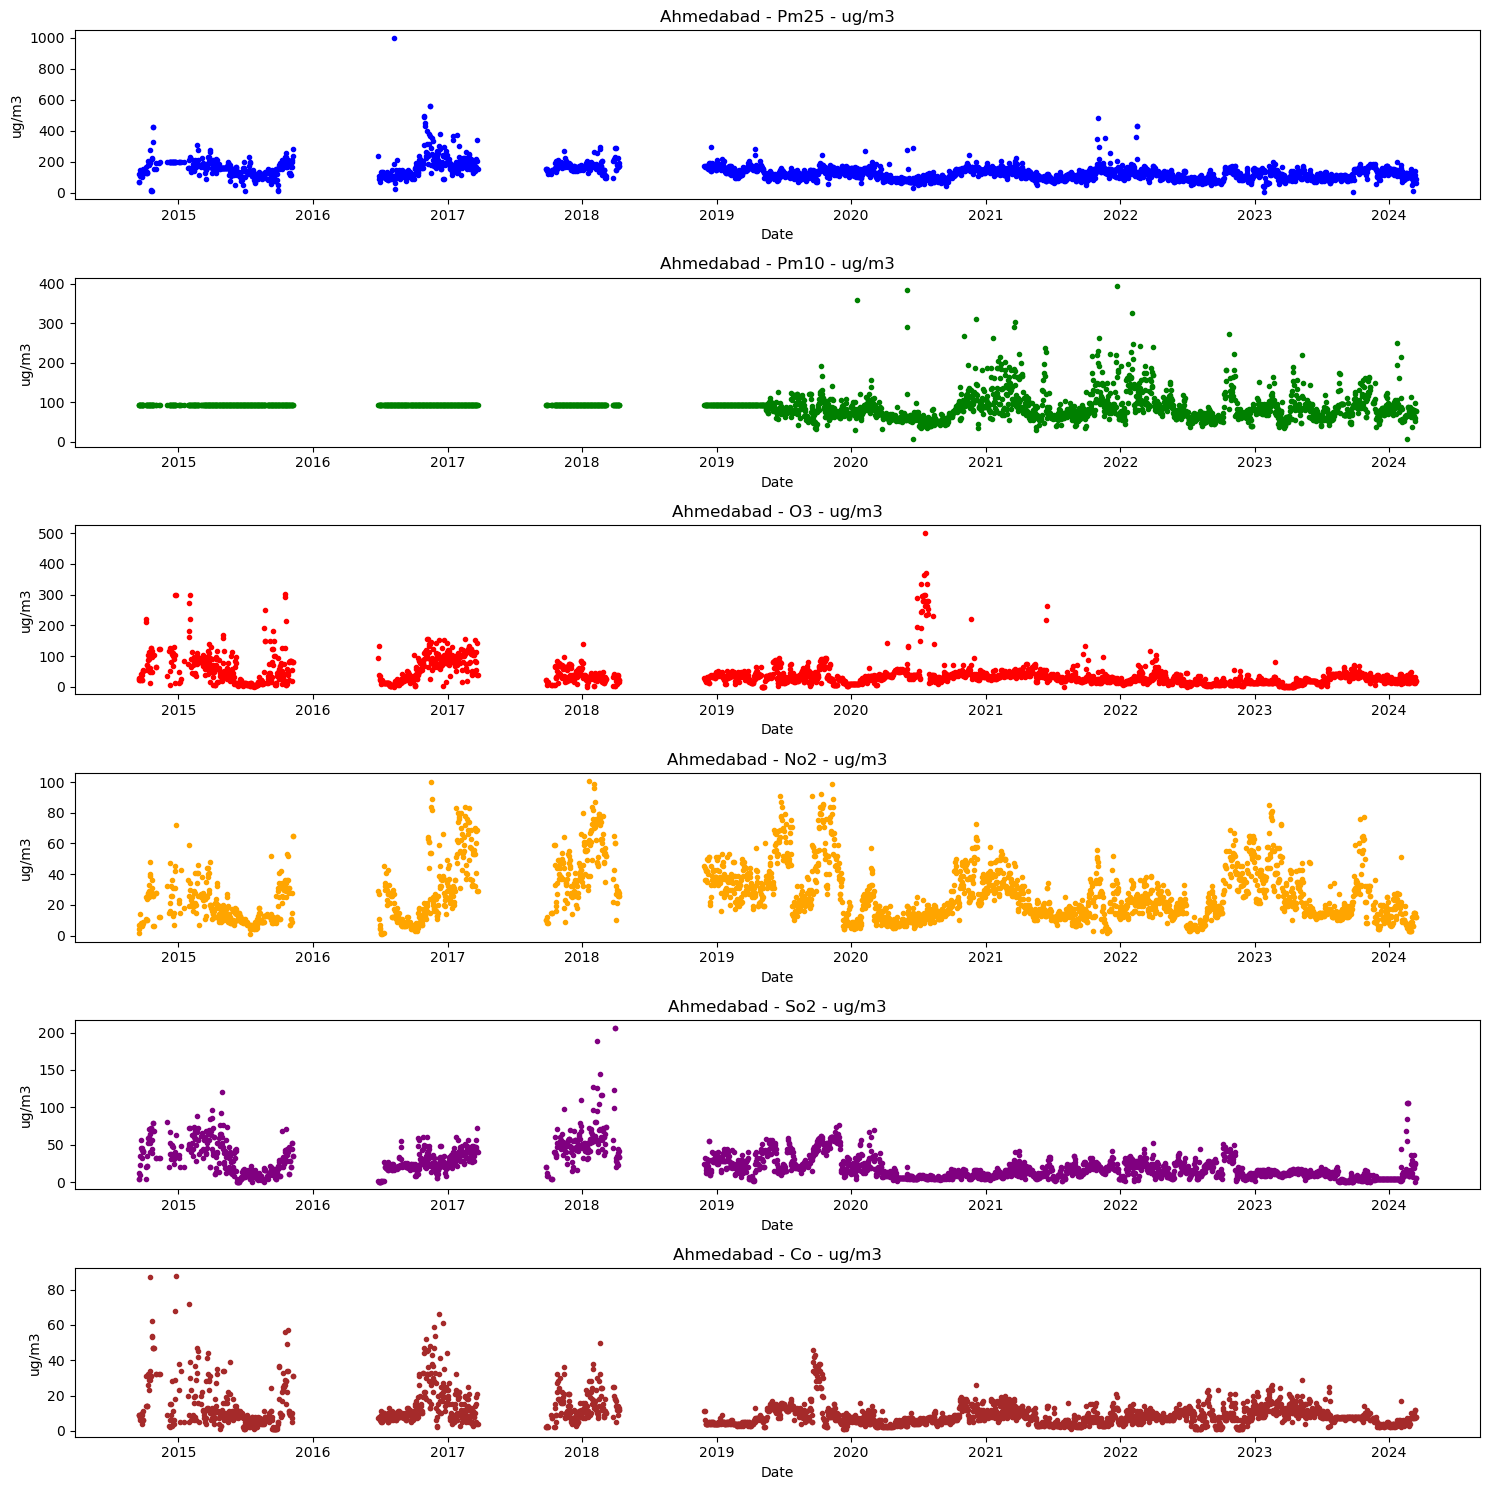

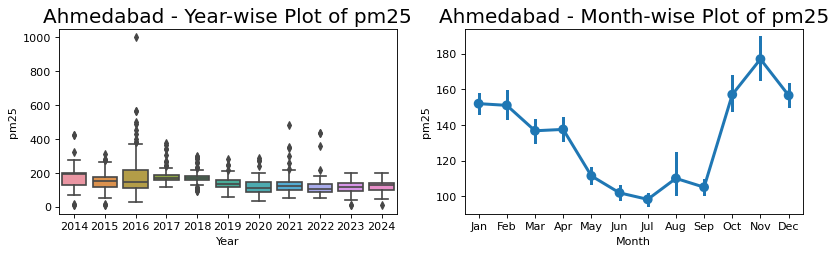

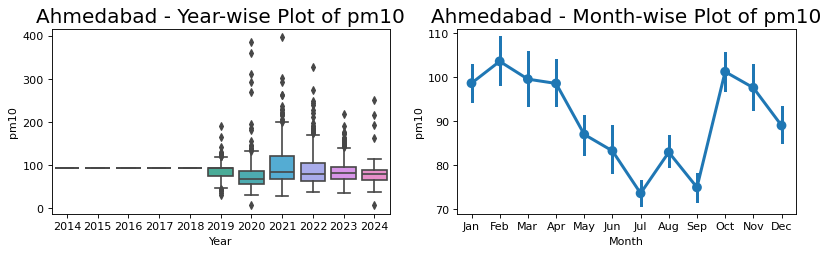

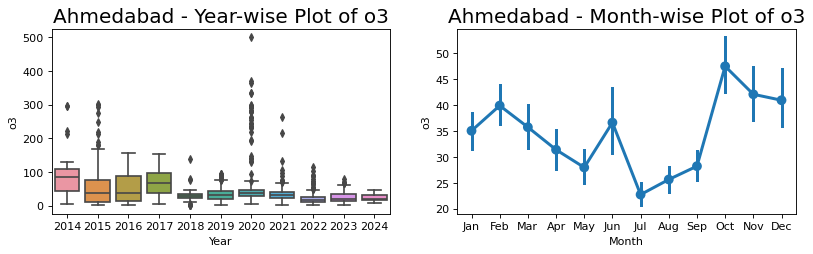

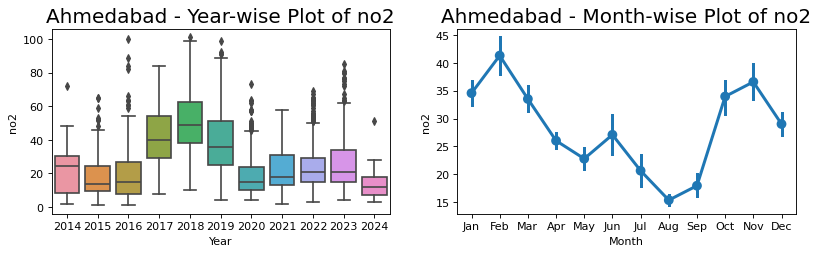

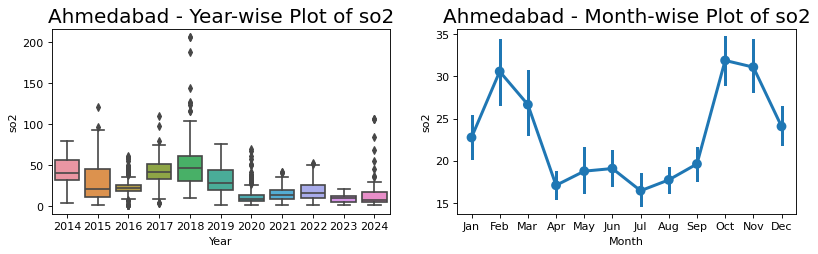

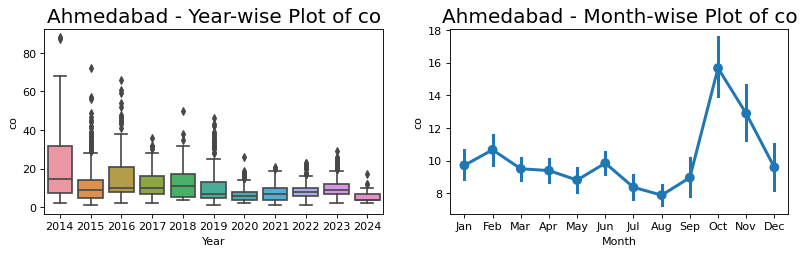

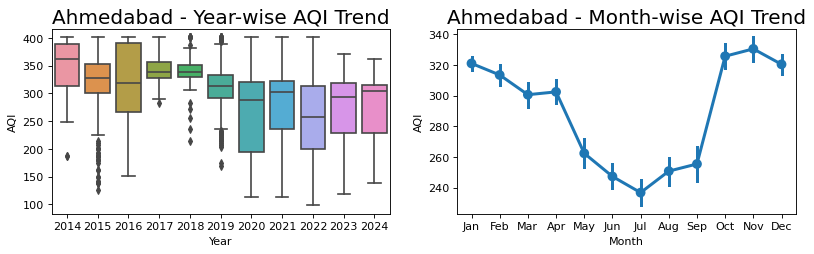

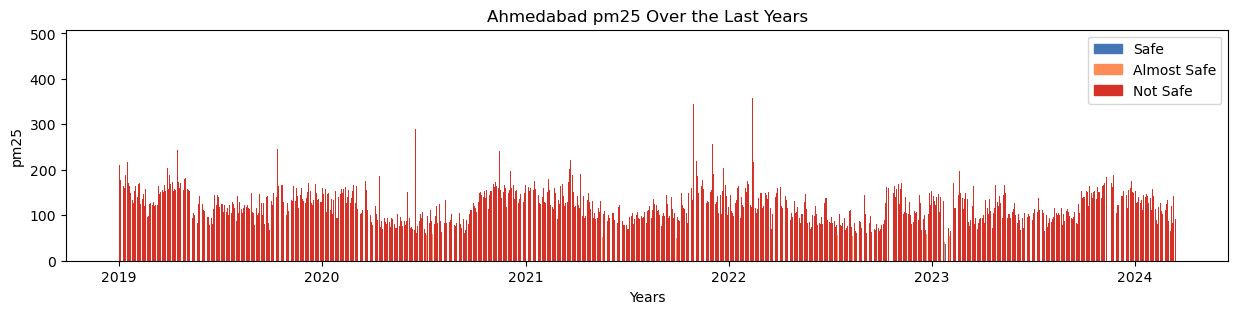

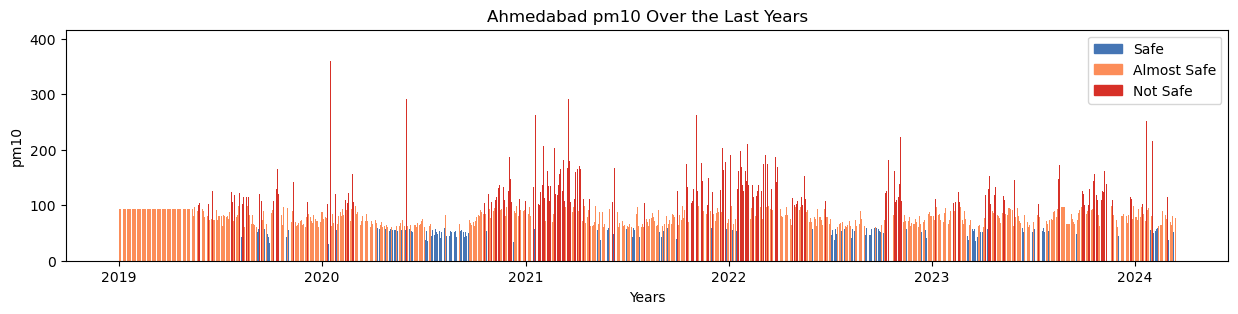

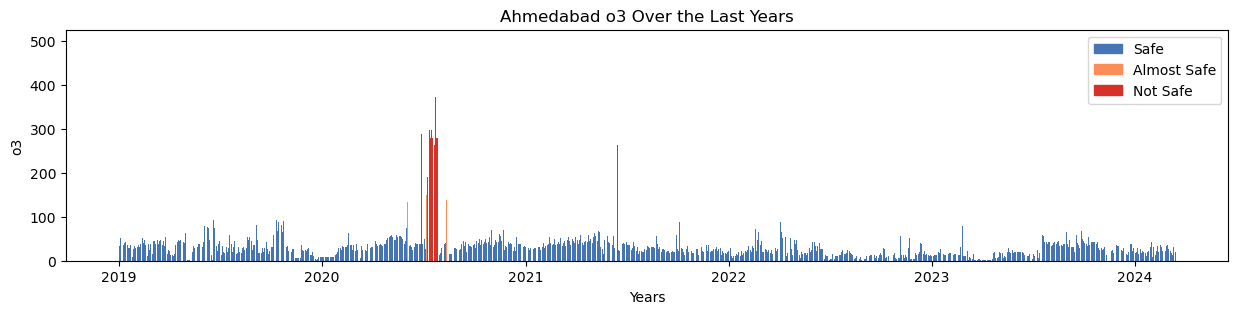

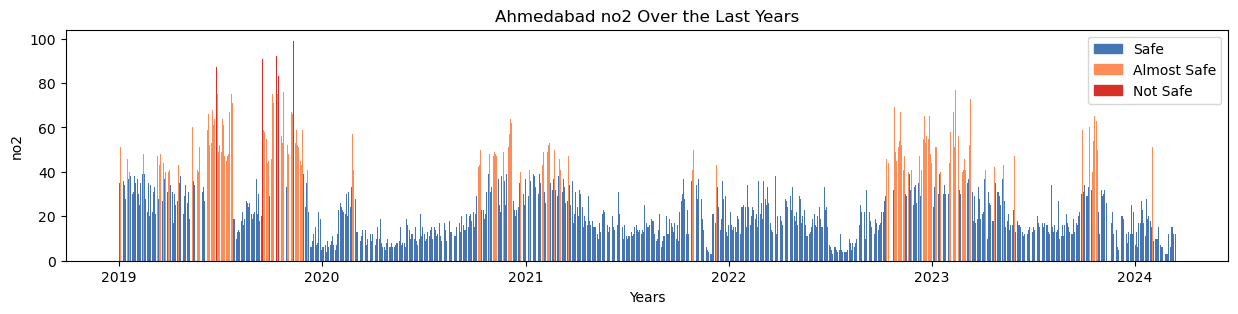

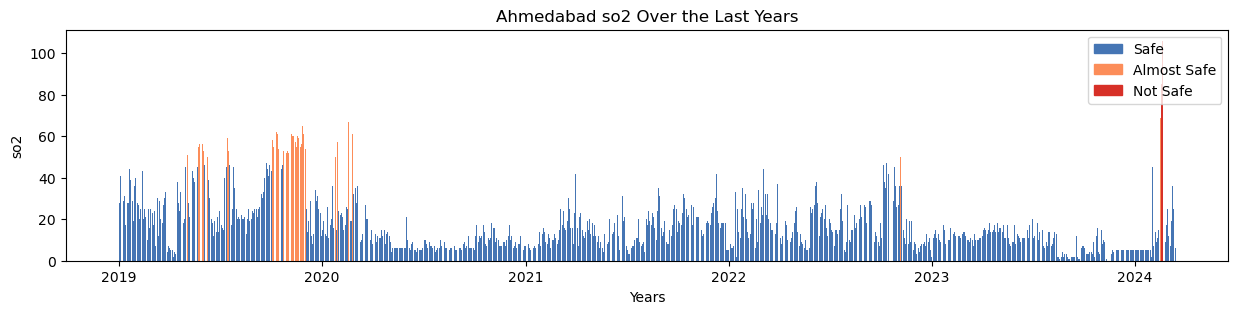

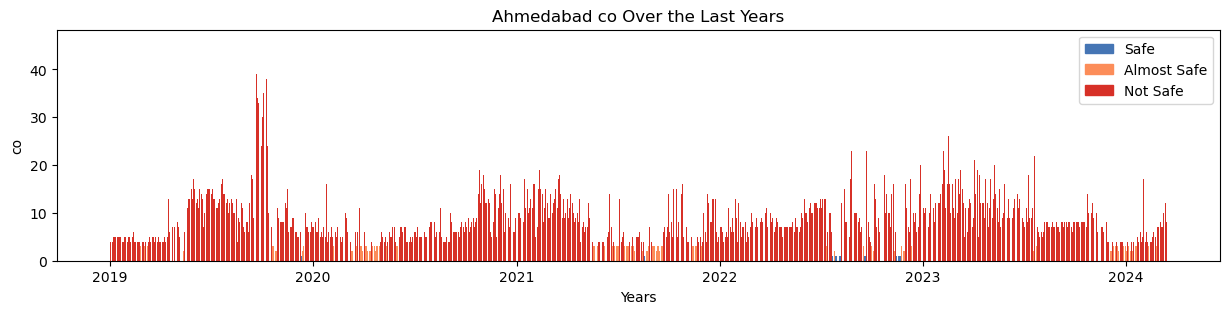


Processing file: aqi_Bangalore.csv


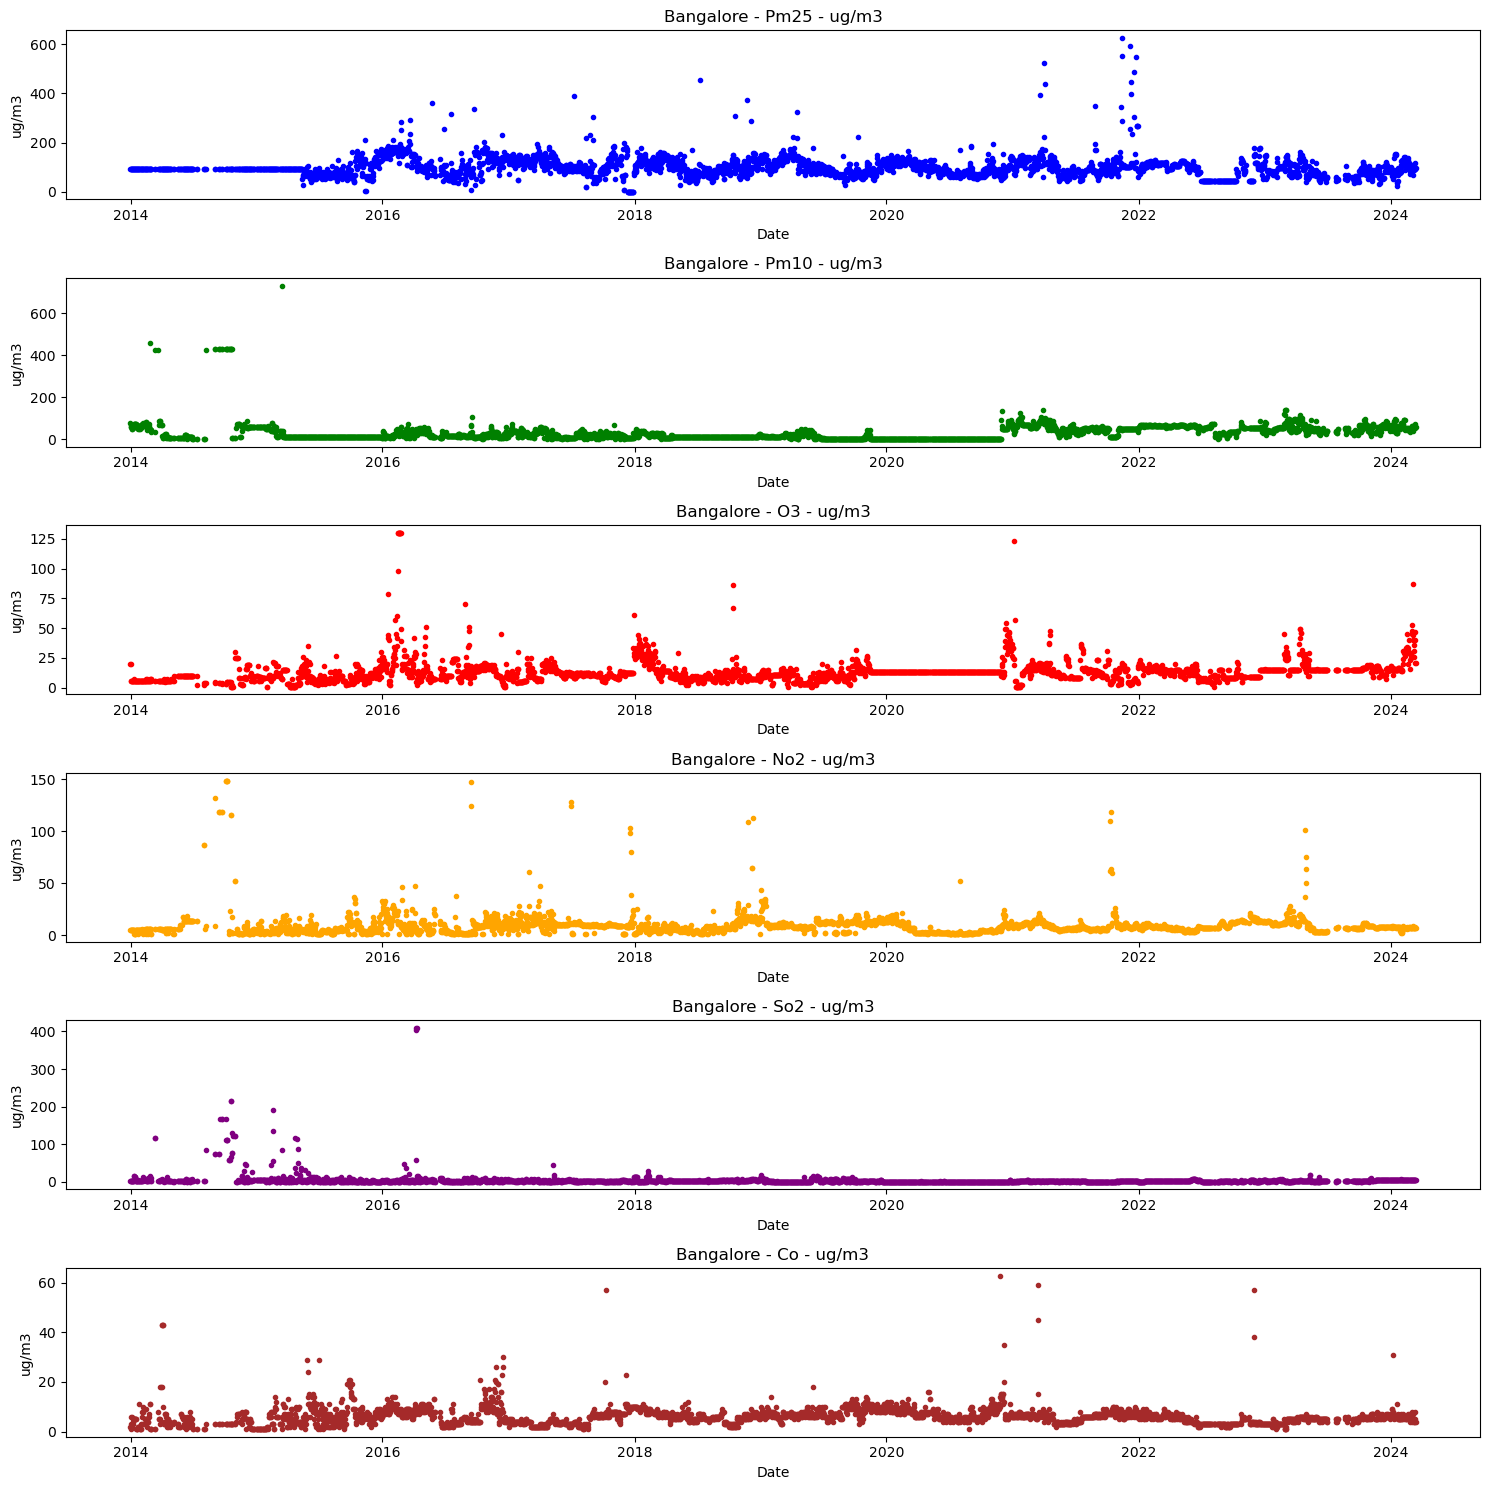

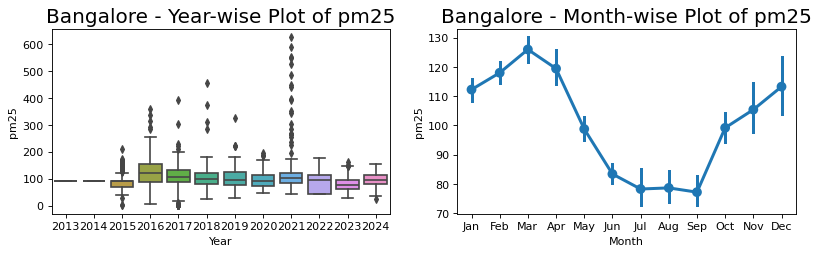

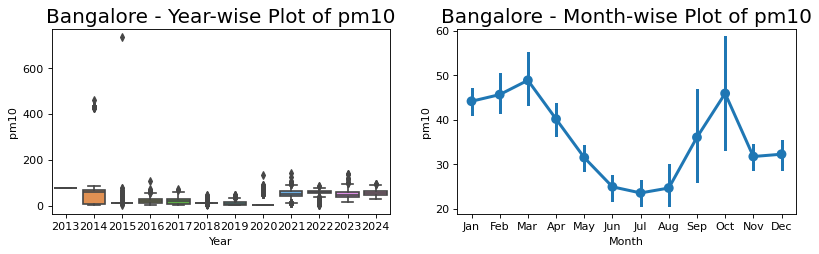

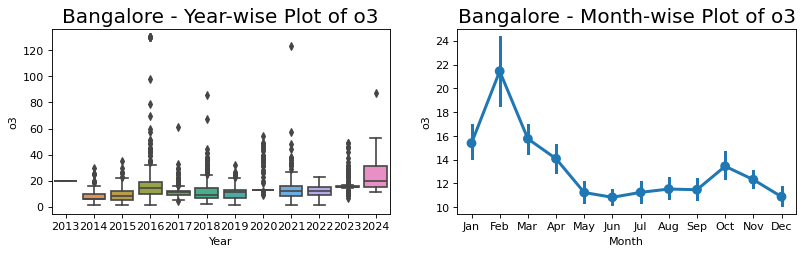

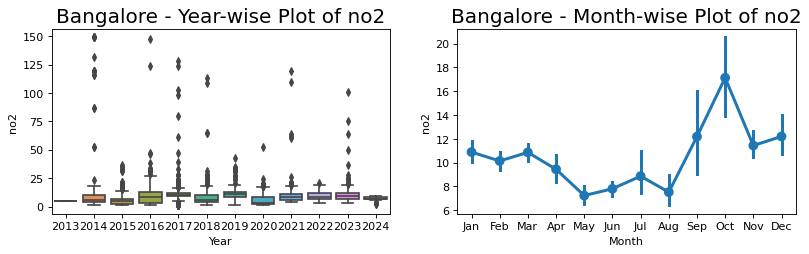

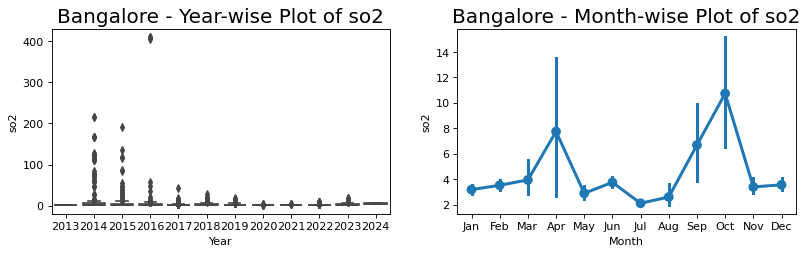

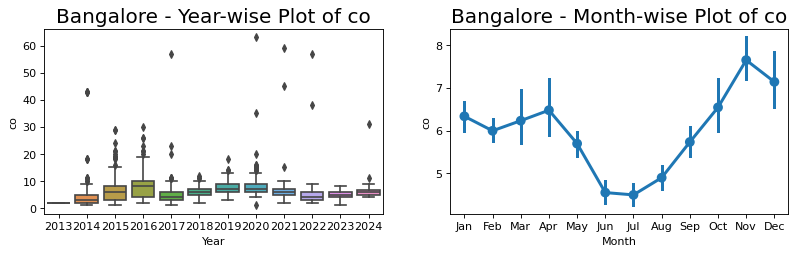

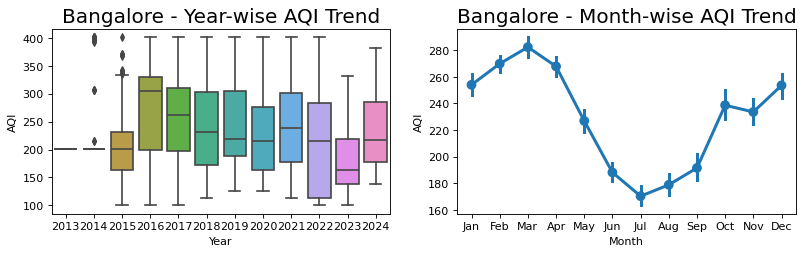

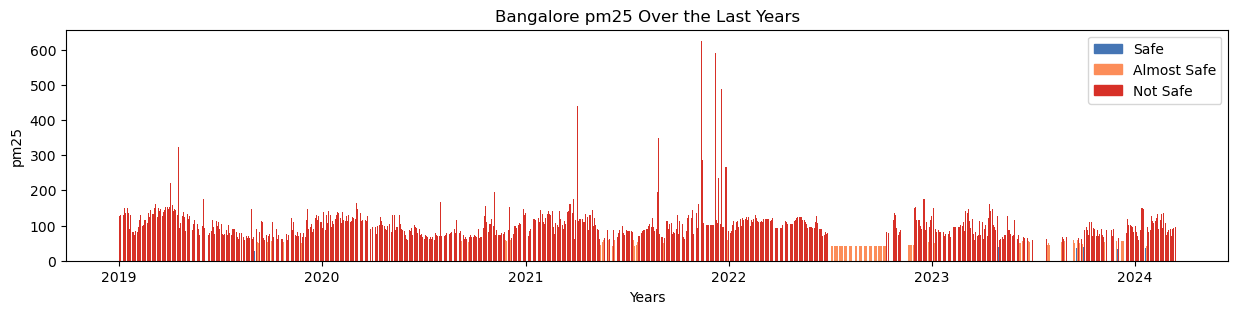

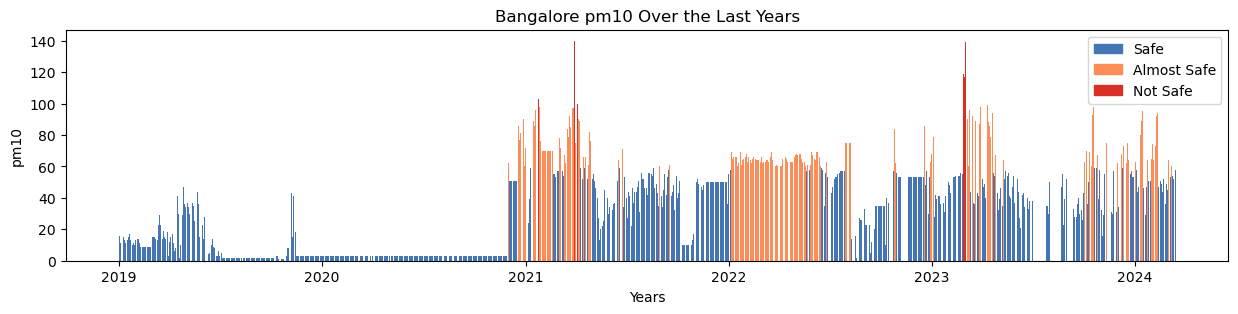

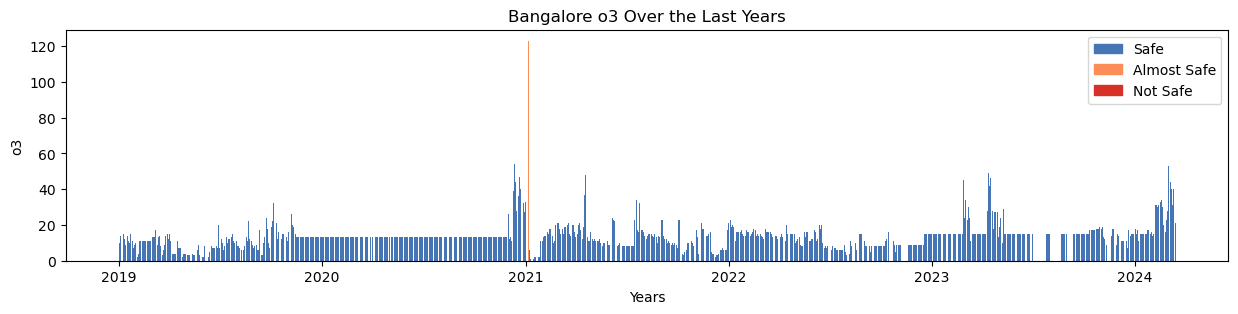

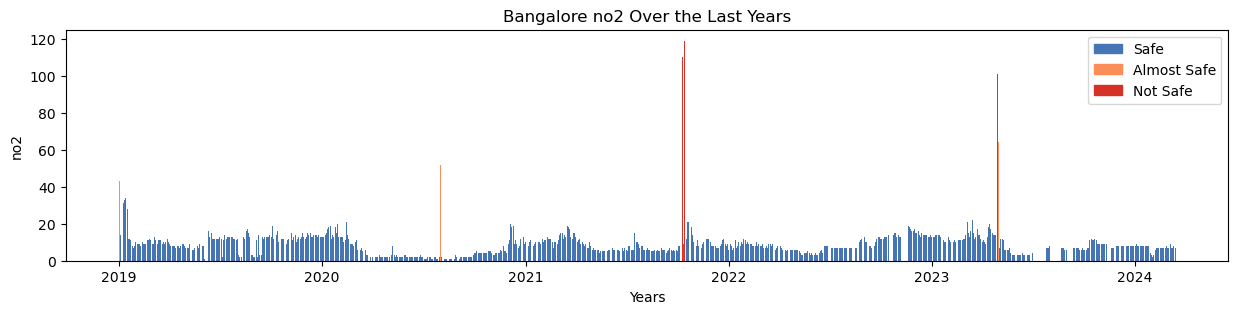

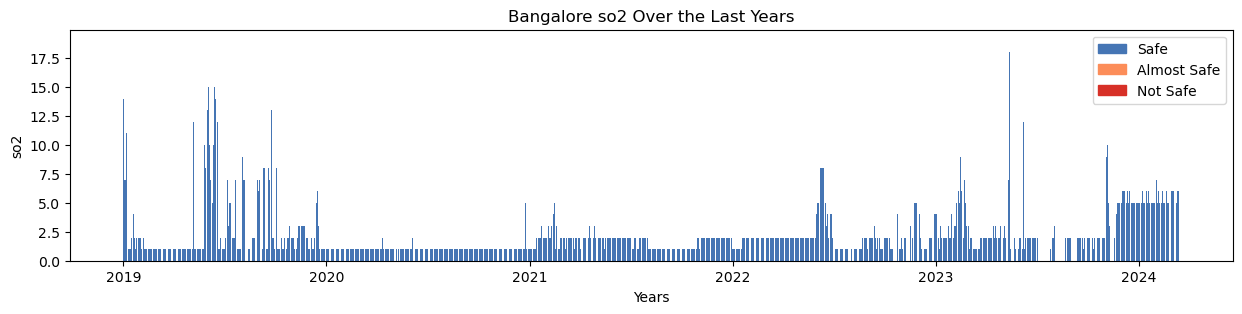

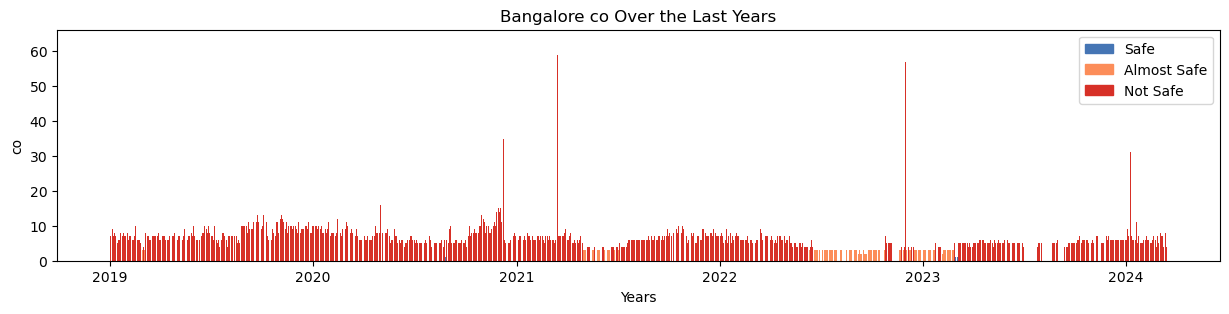


Processing file: aqi_Bhopal.csv


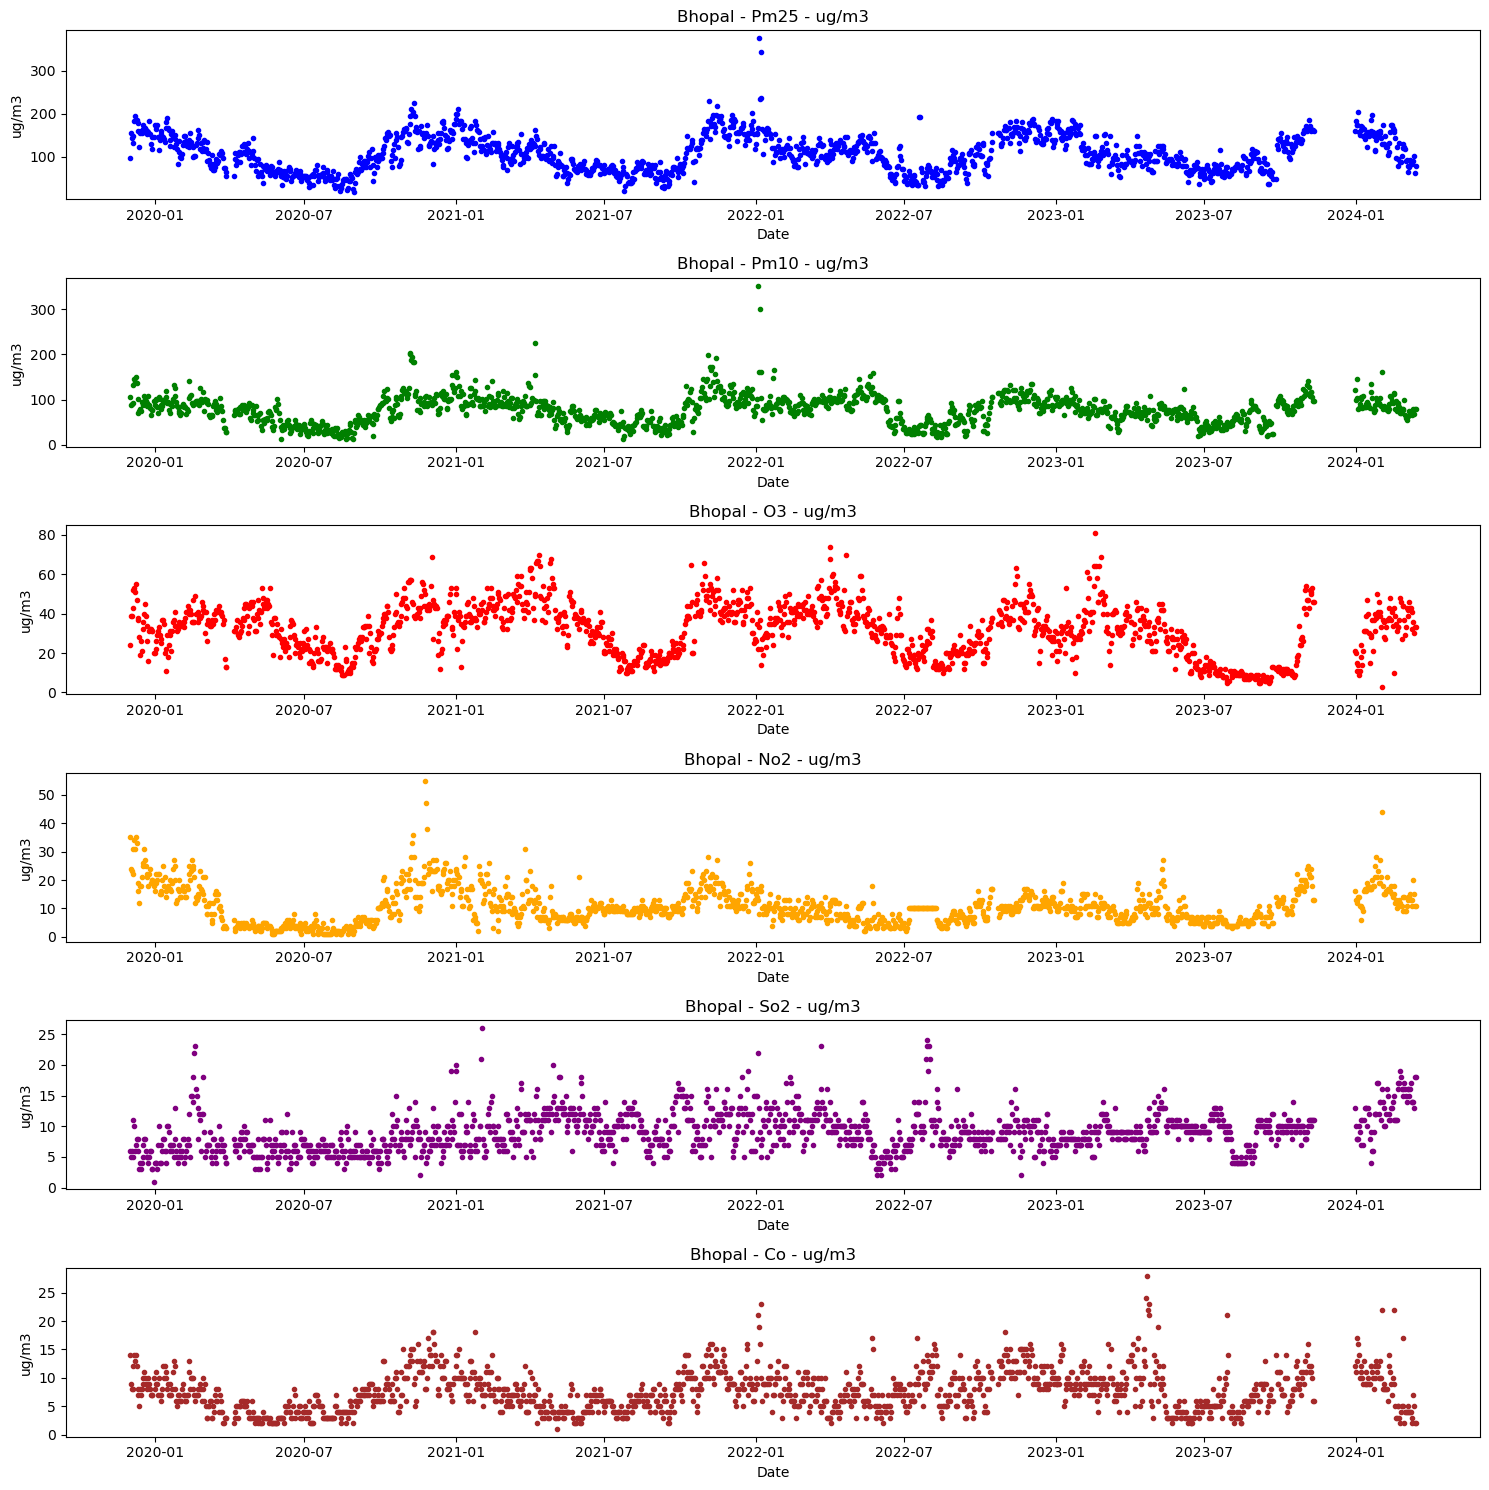

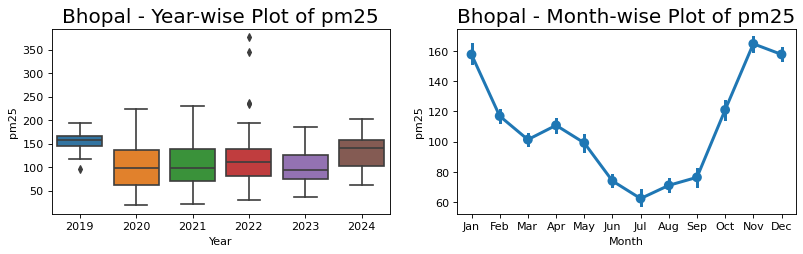

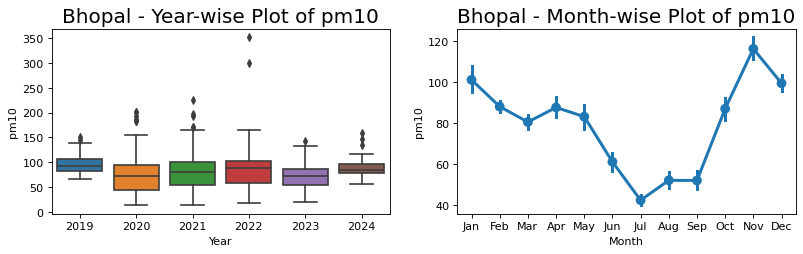

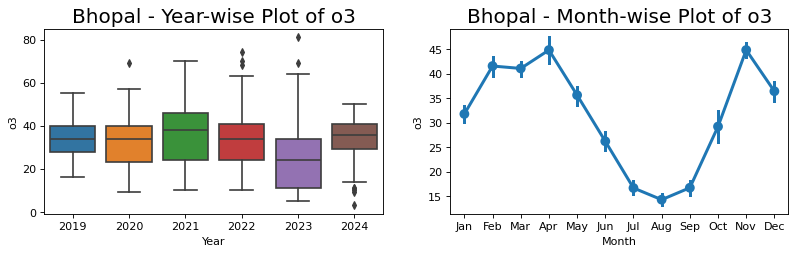

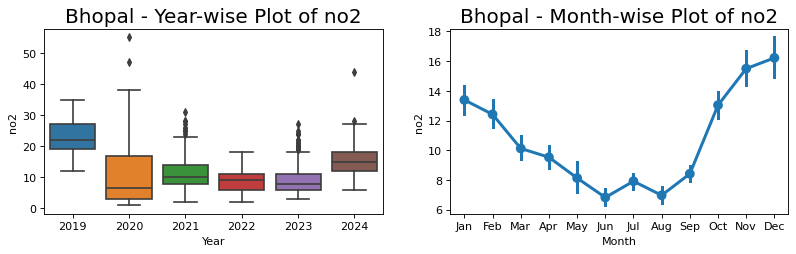

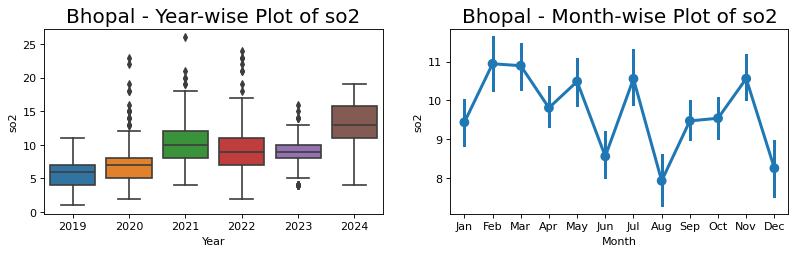

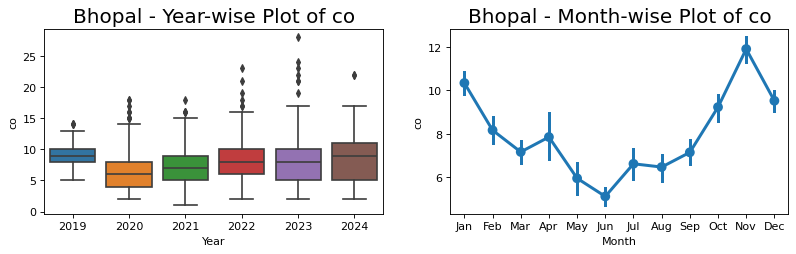

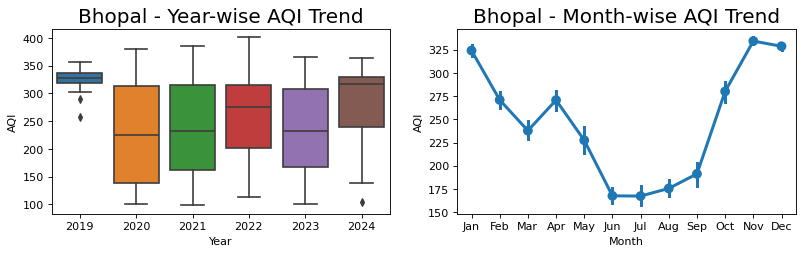

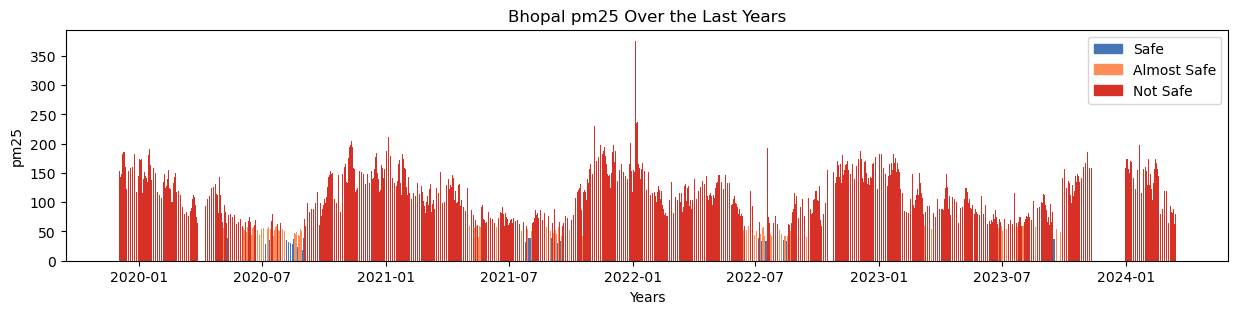

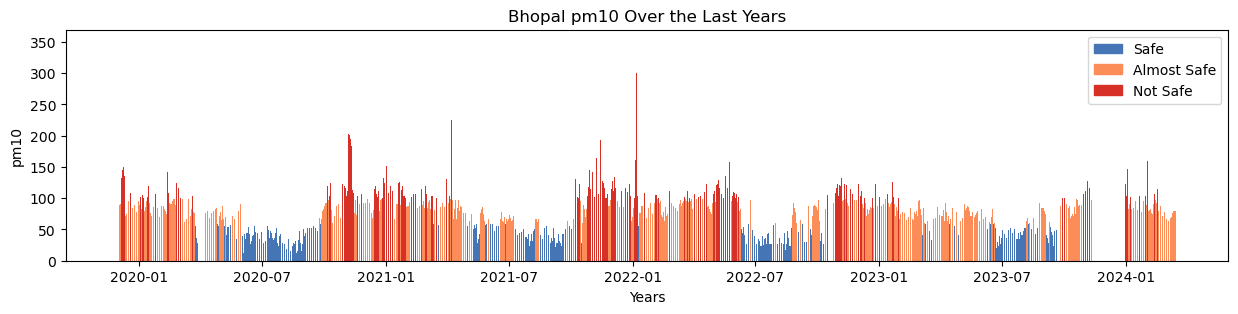

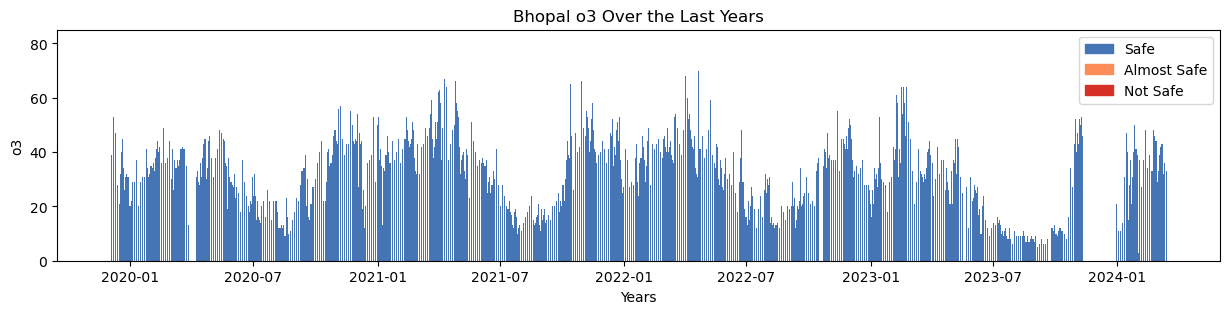

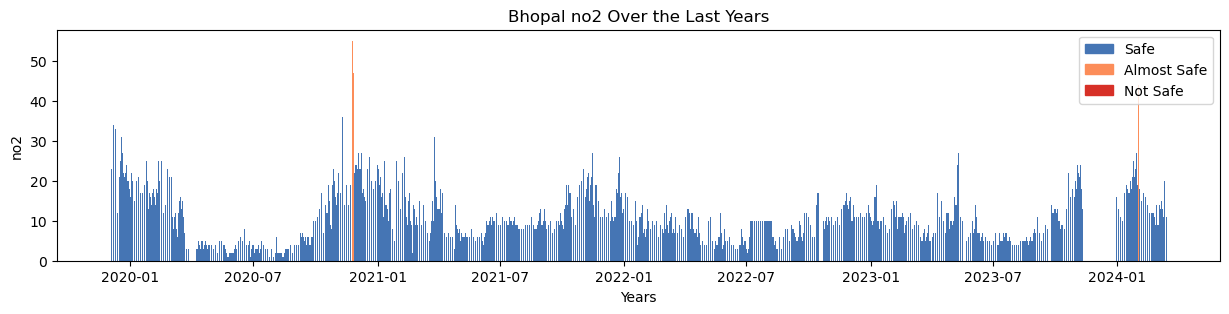

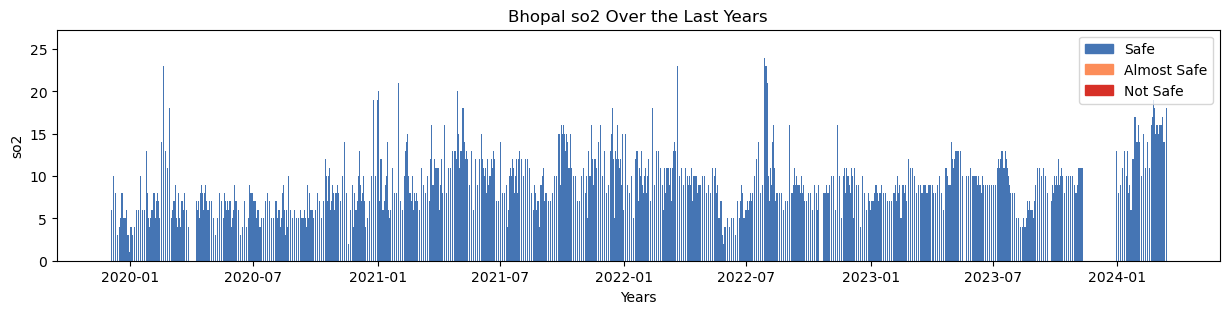

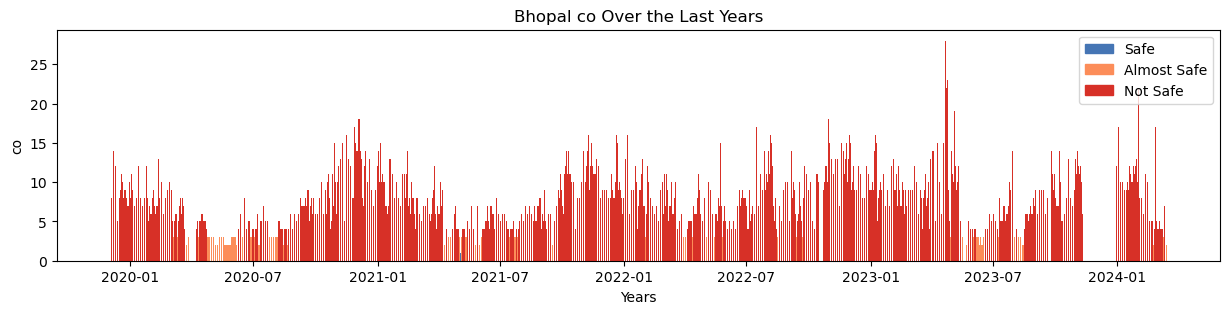


Processing file: aqi_Chennai.csv


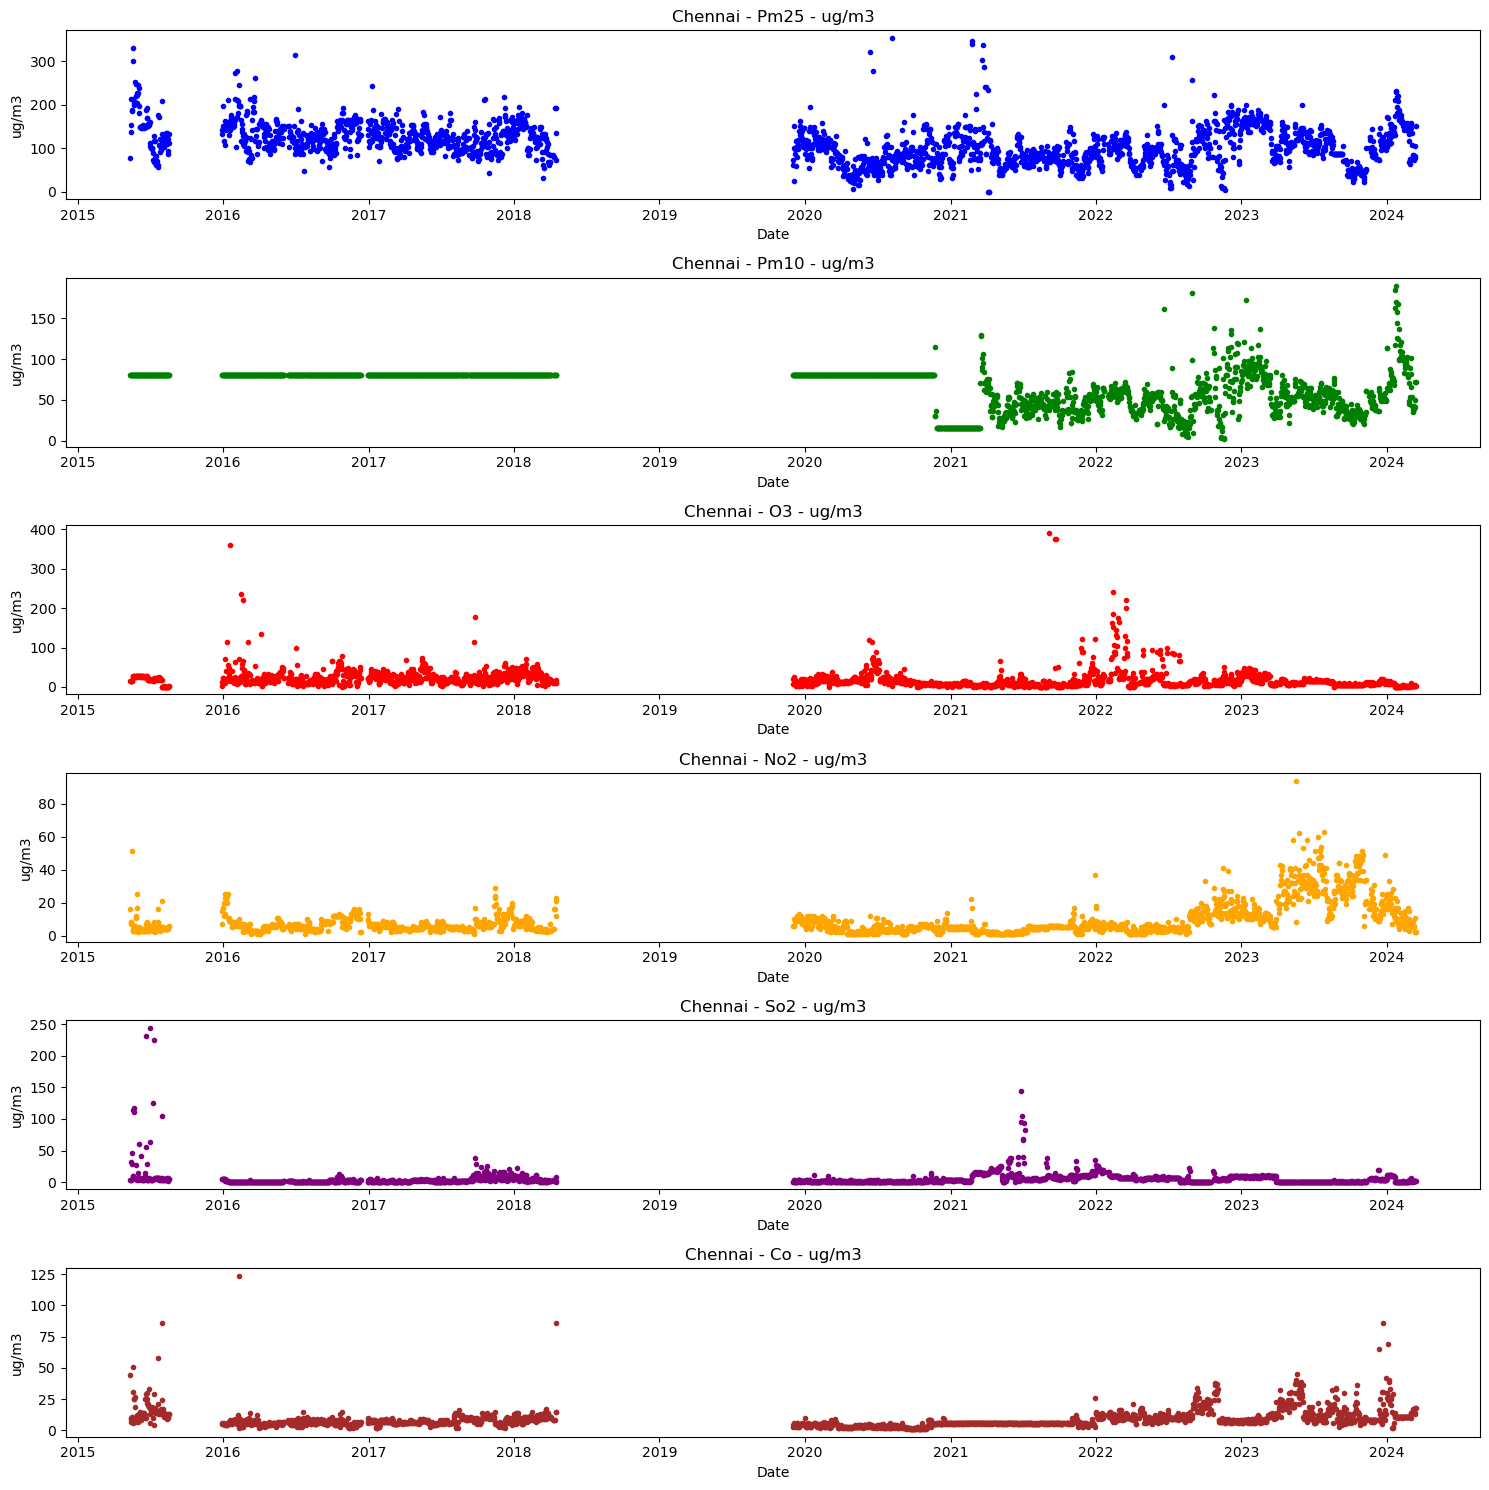

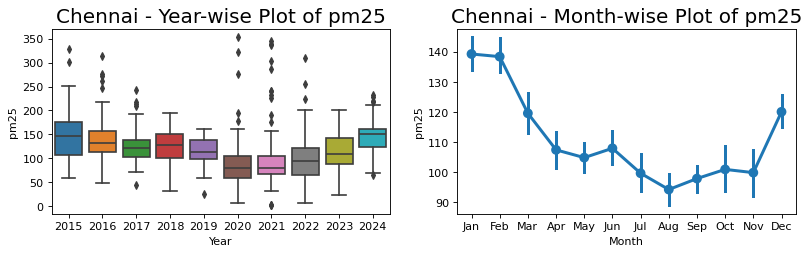

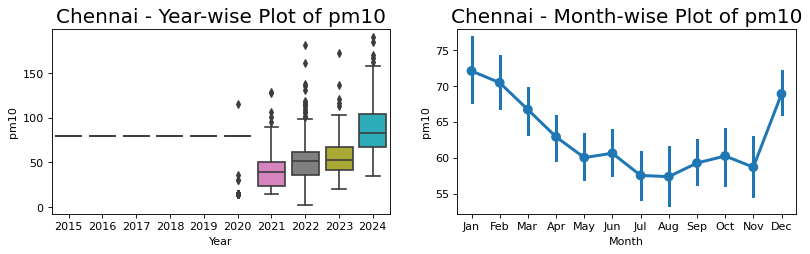

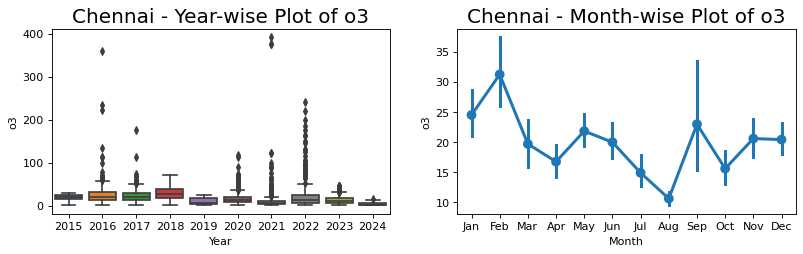

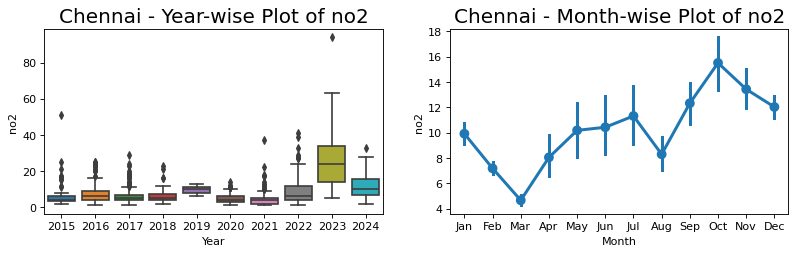

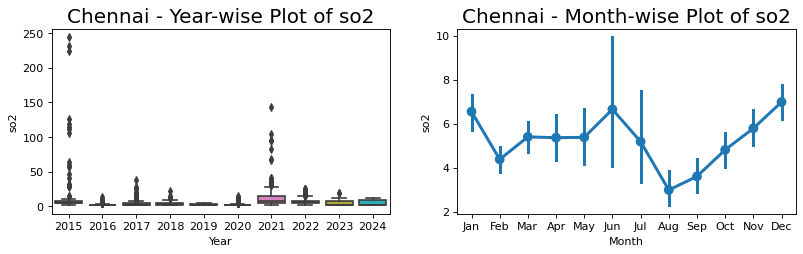

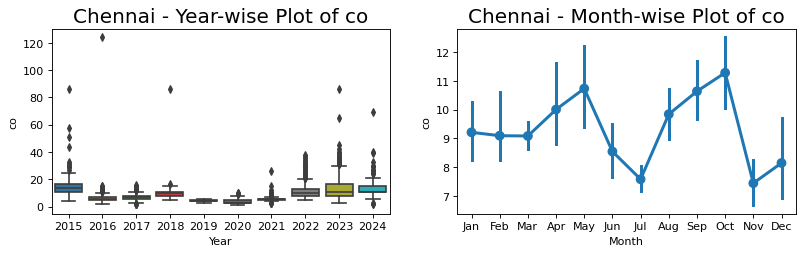

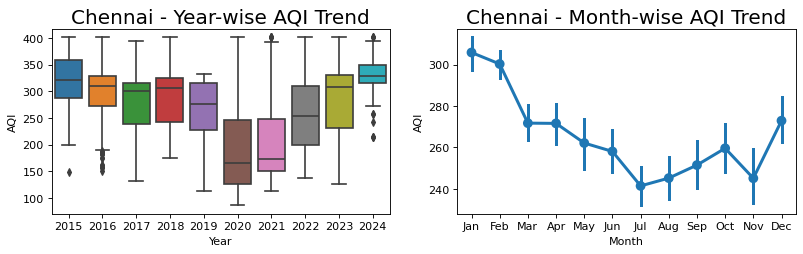

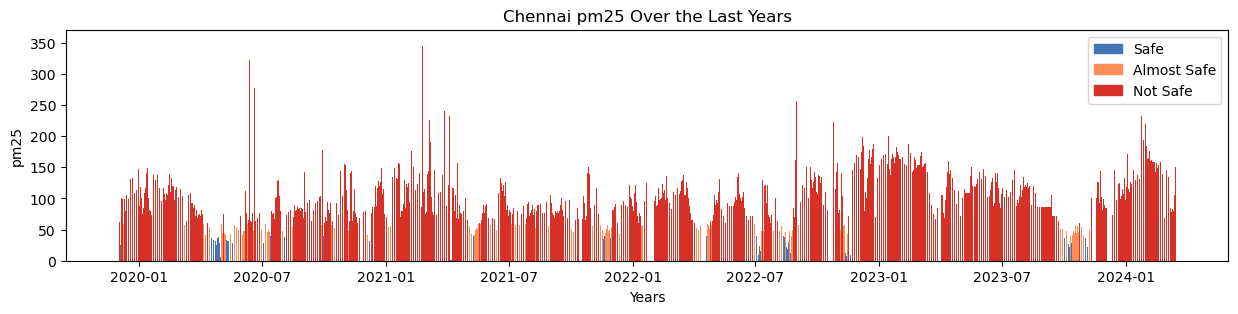

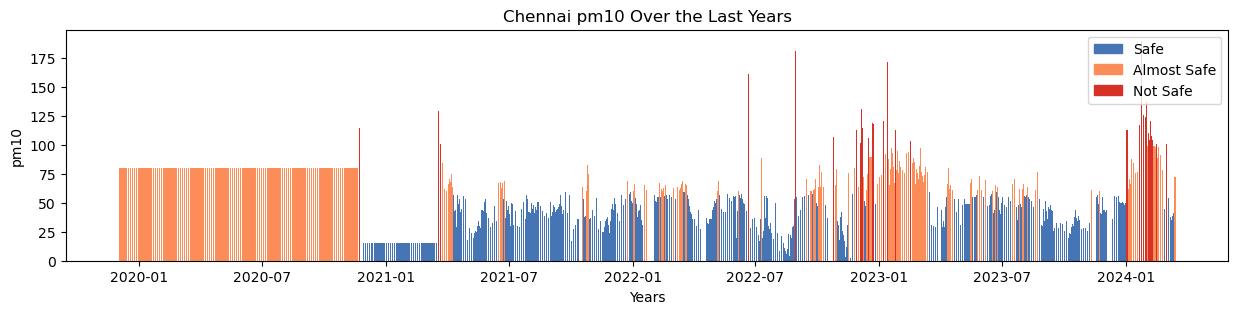

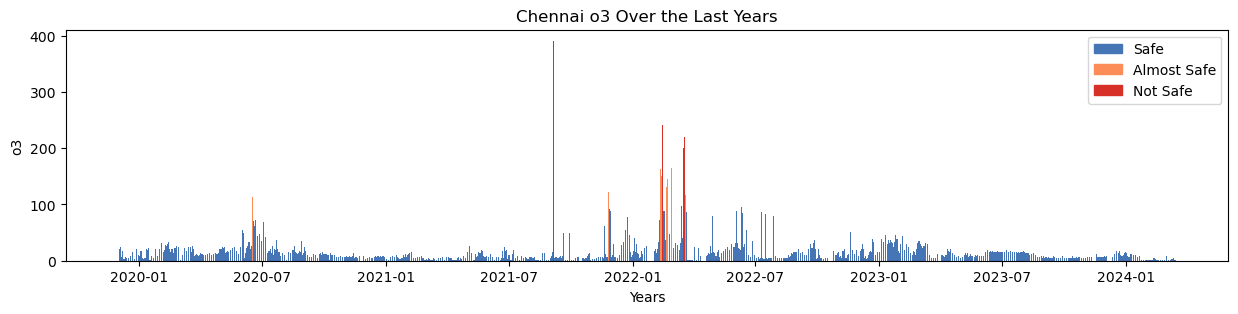

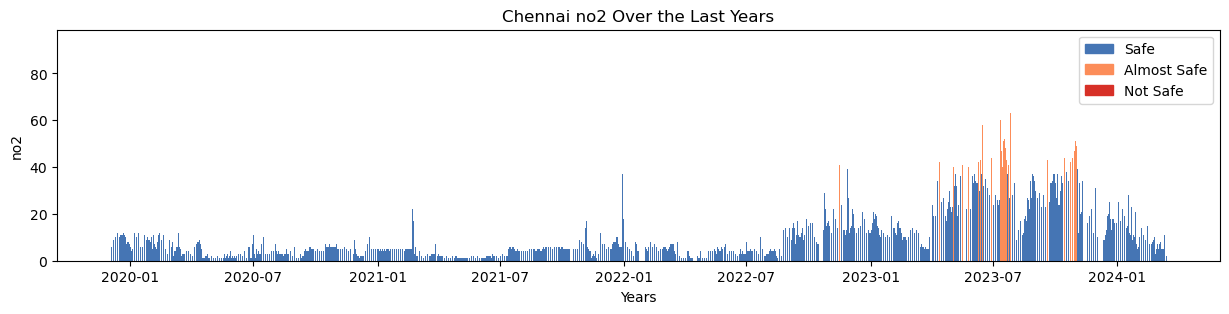

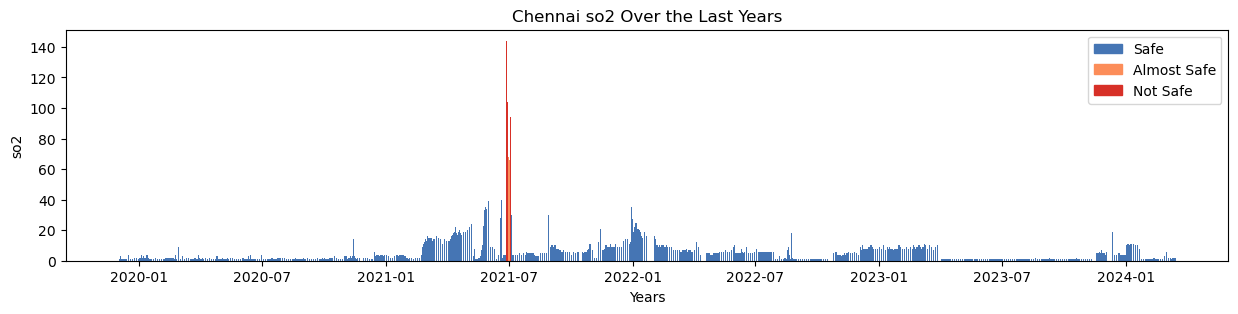

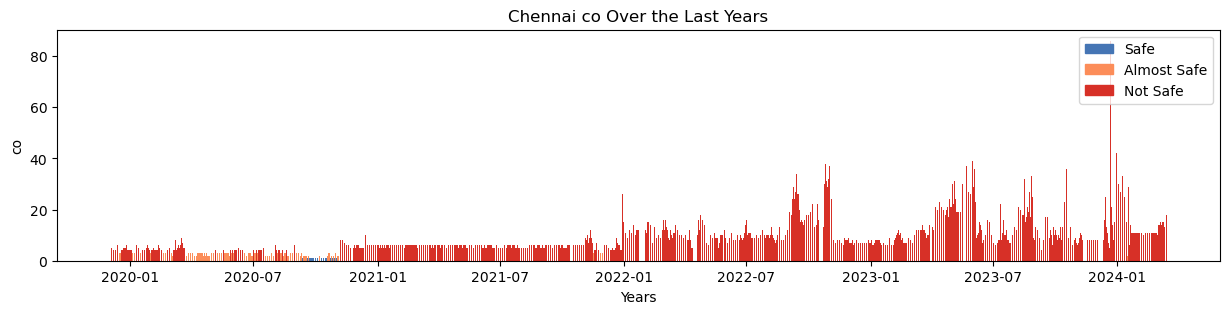


Processing file: aqi_Delhi.csv


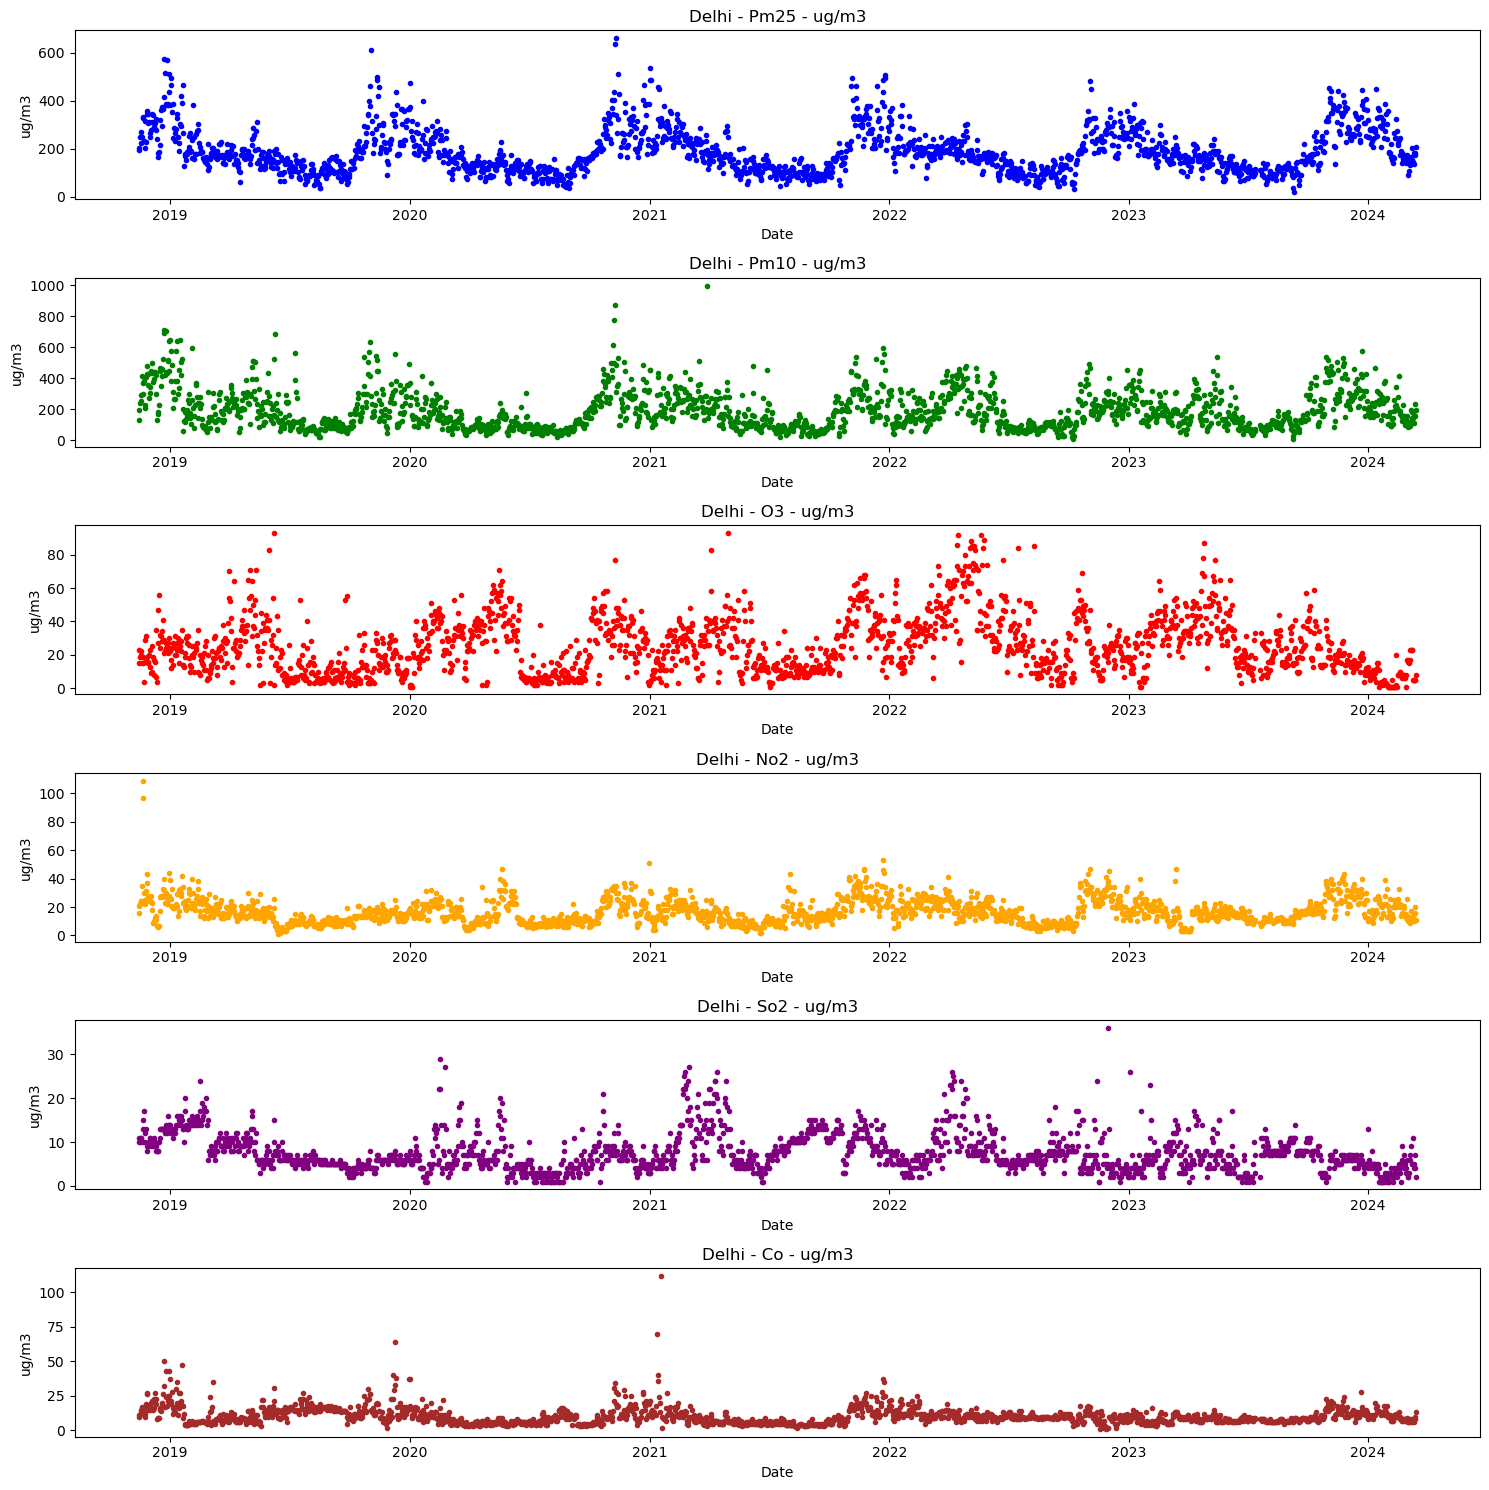

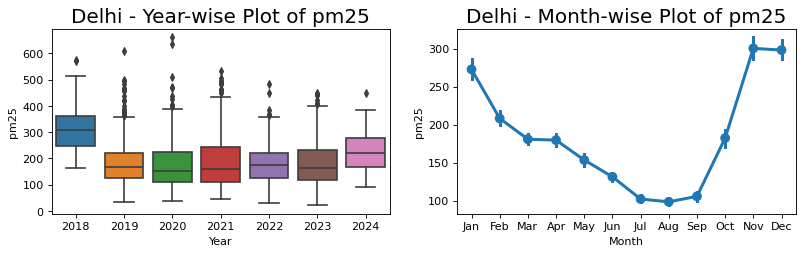

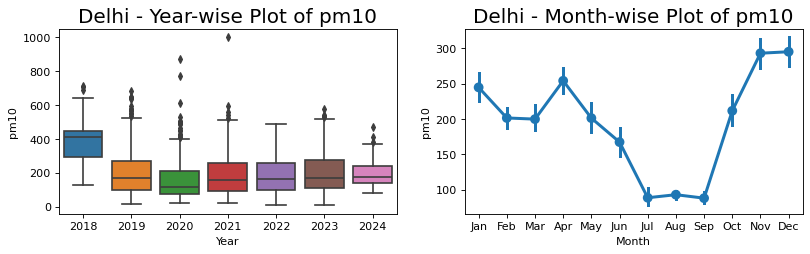

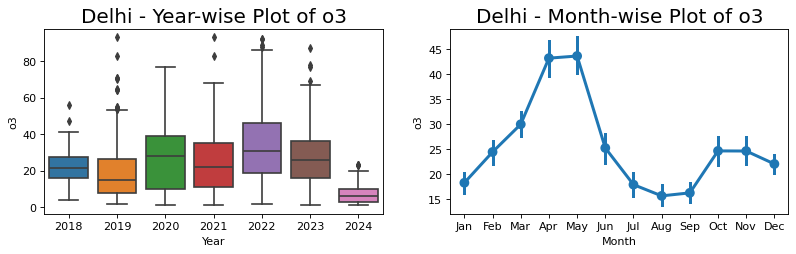

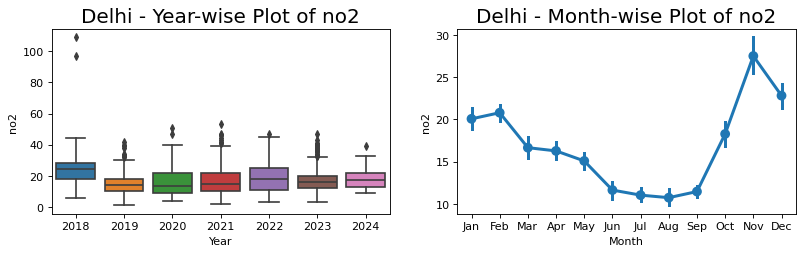

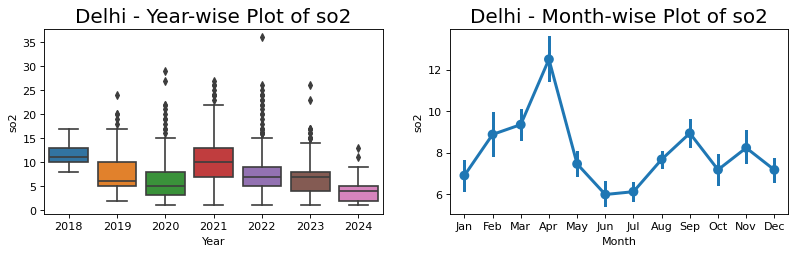

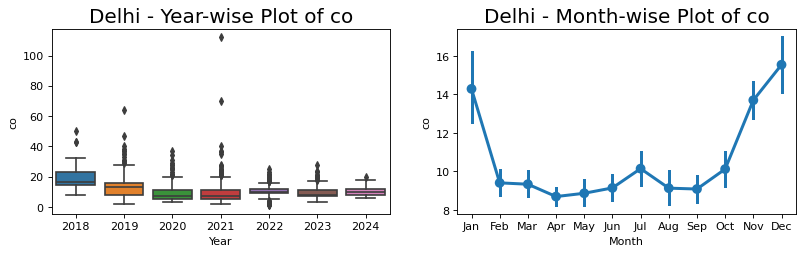

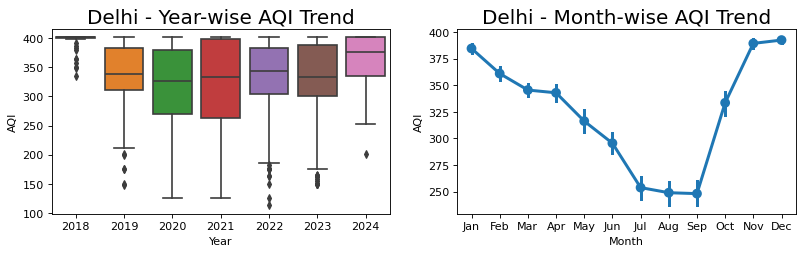

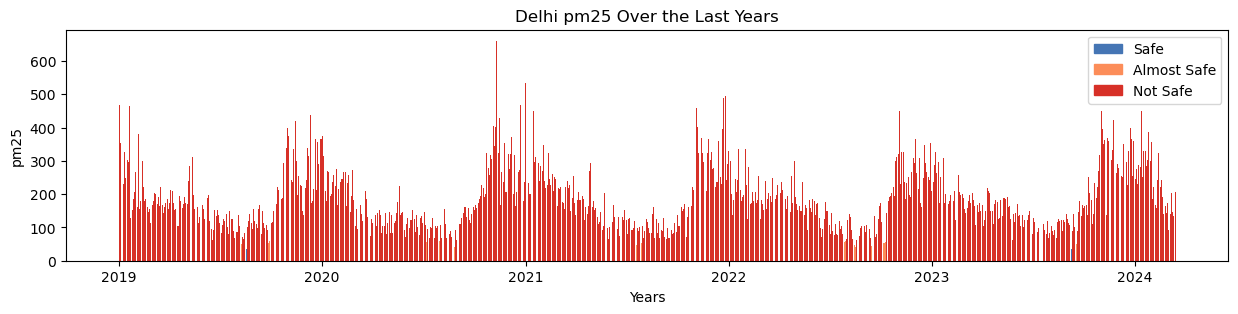

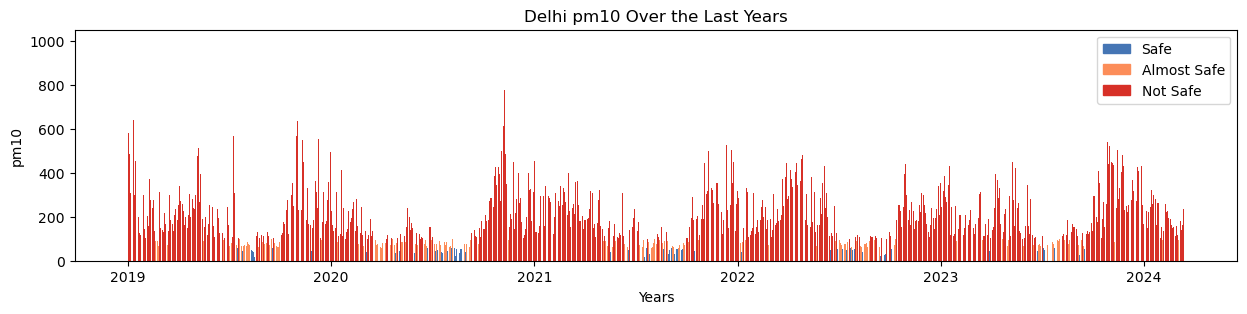

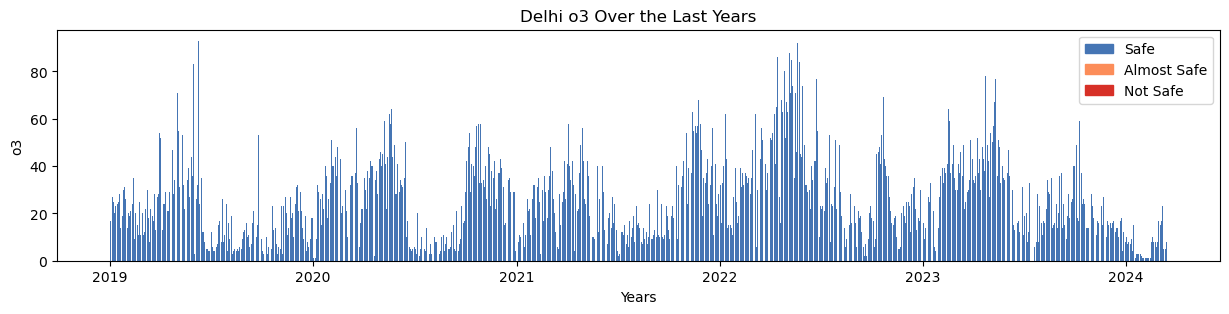

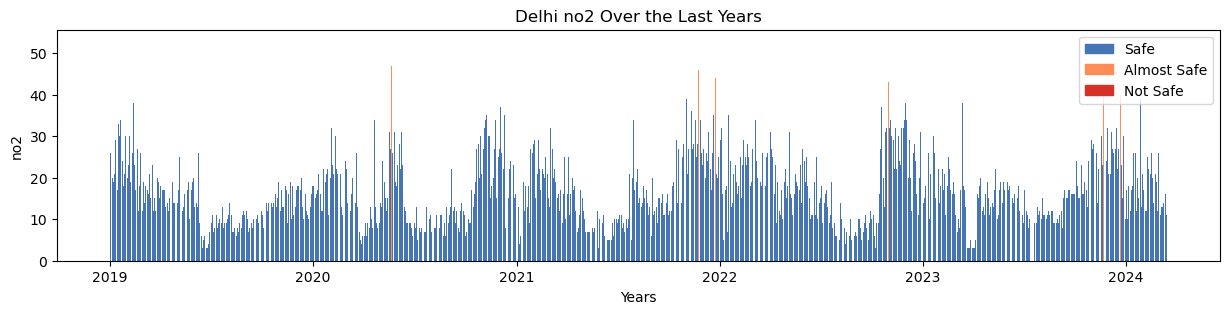

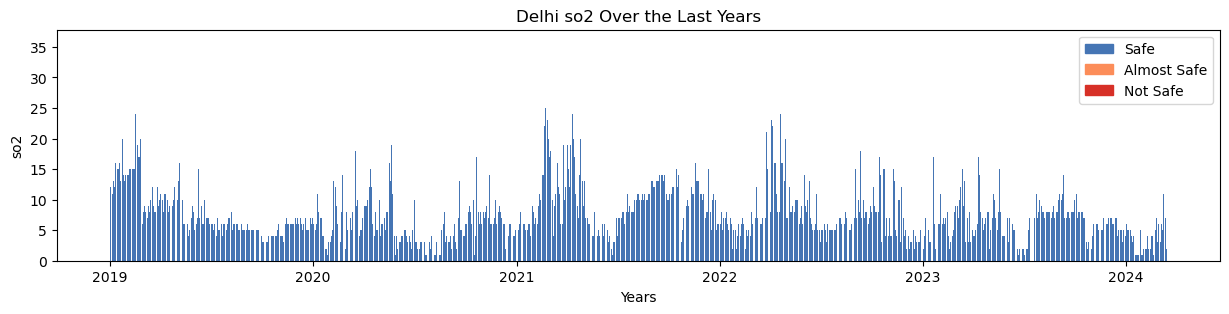

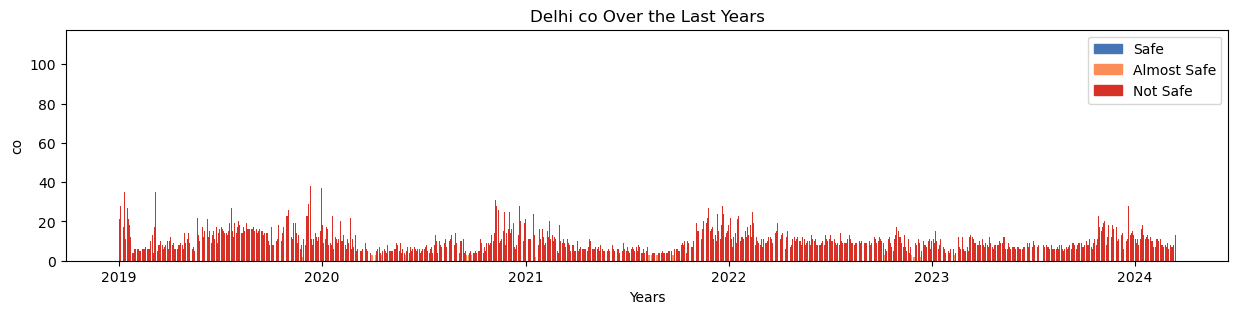


Processing file: aqi_Hyderabad.csv


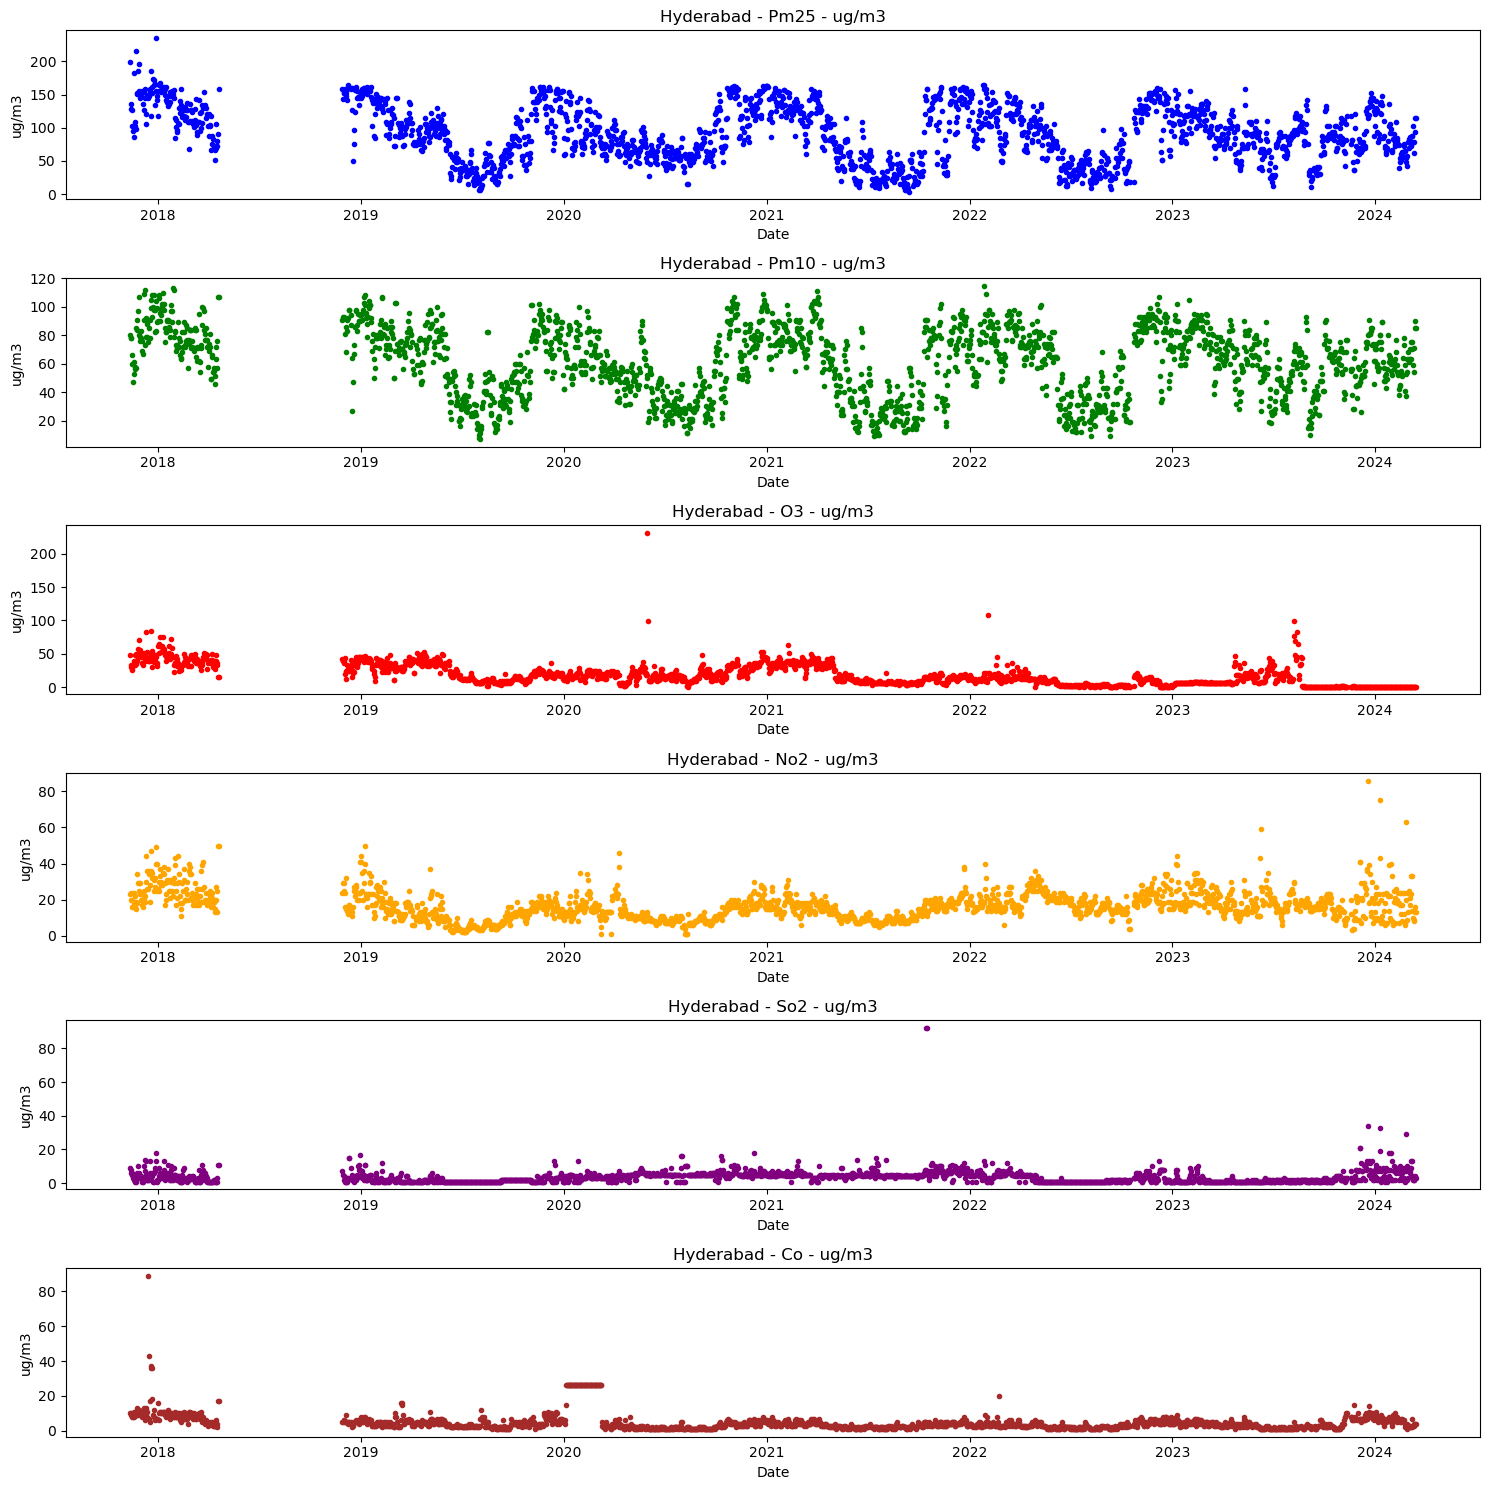

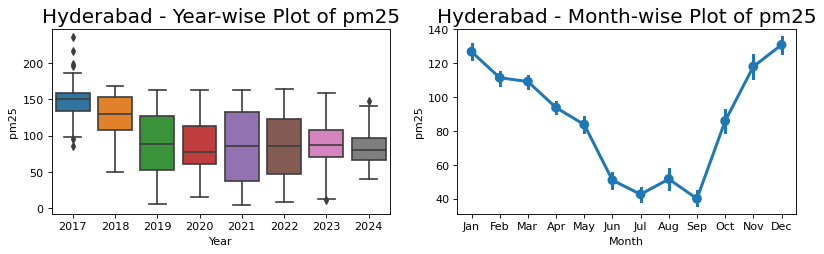

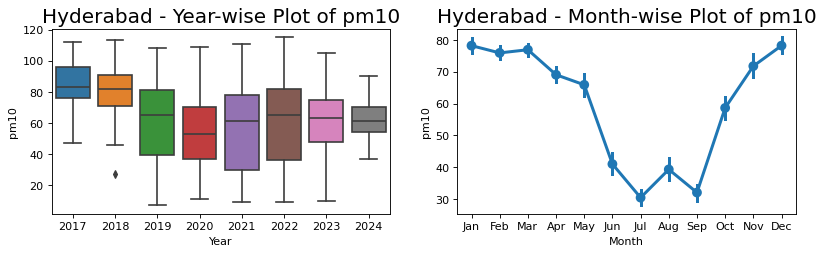

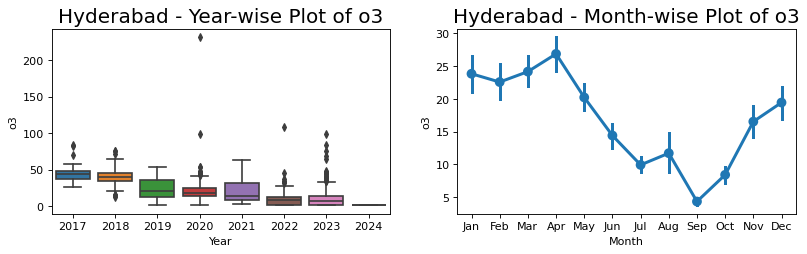

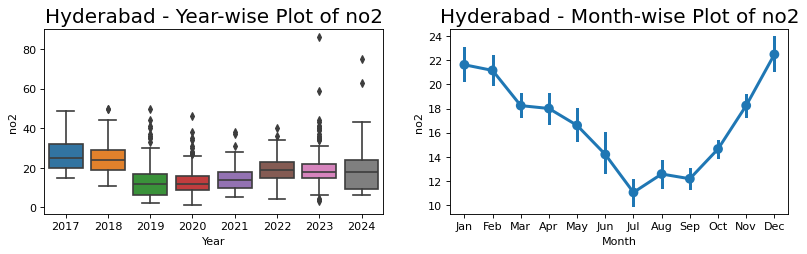

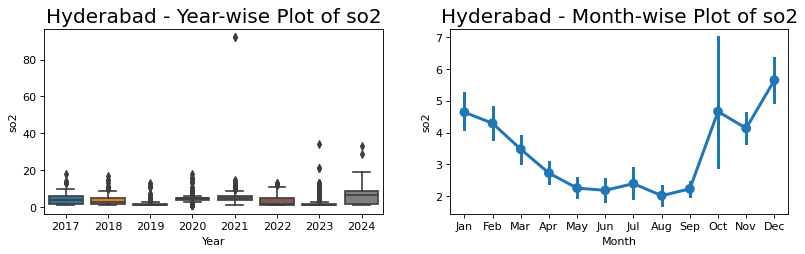

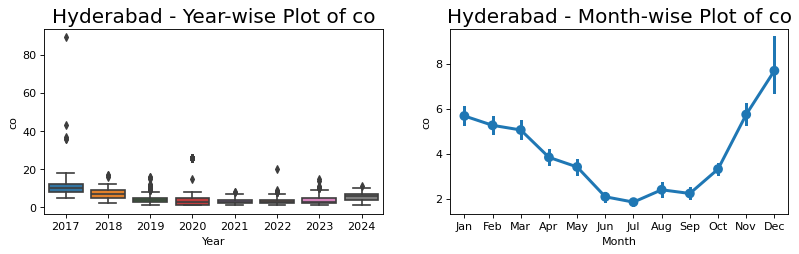

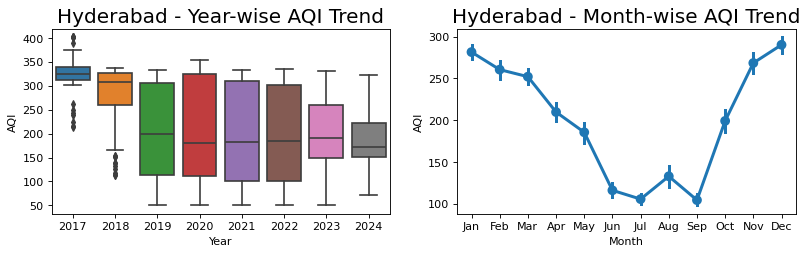

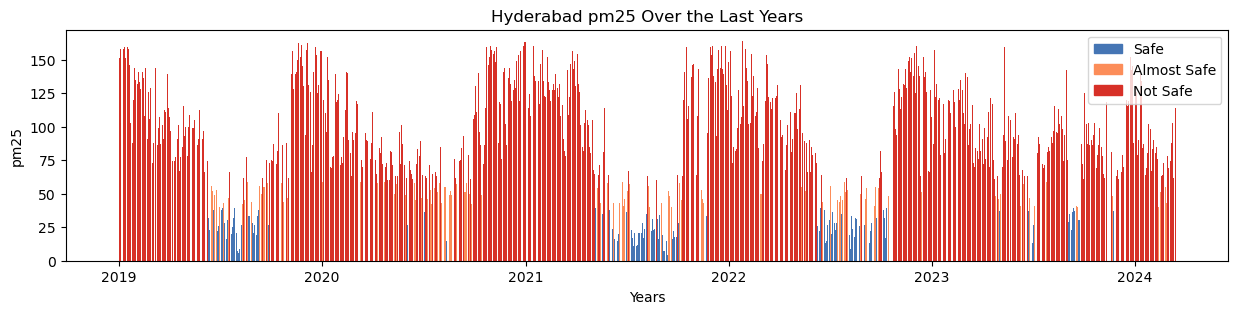

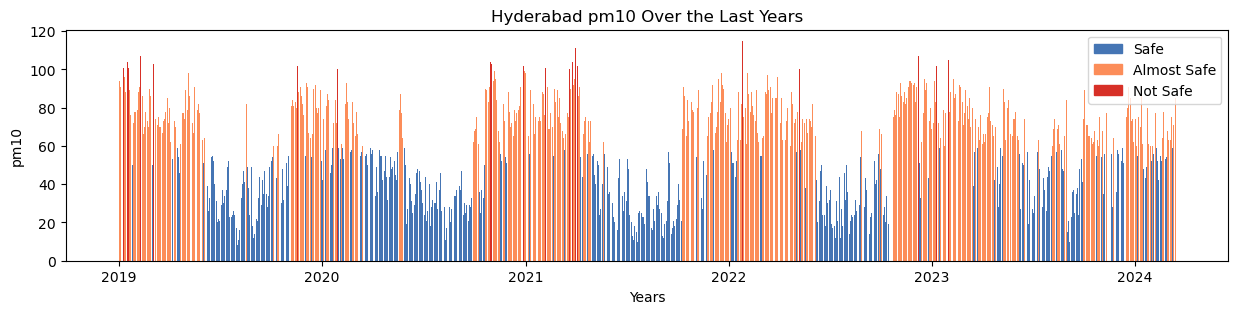

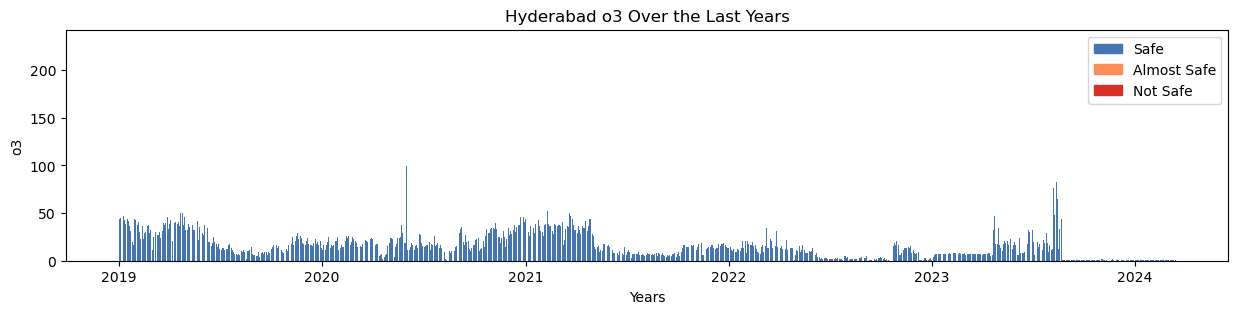

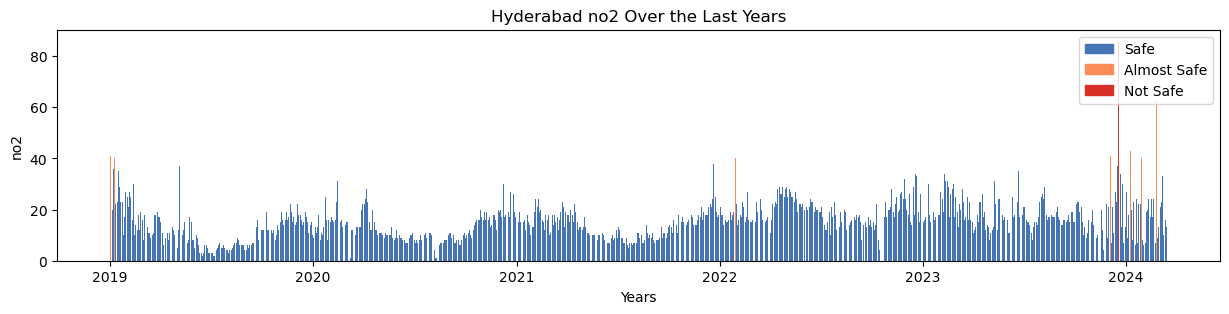

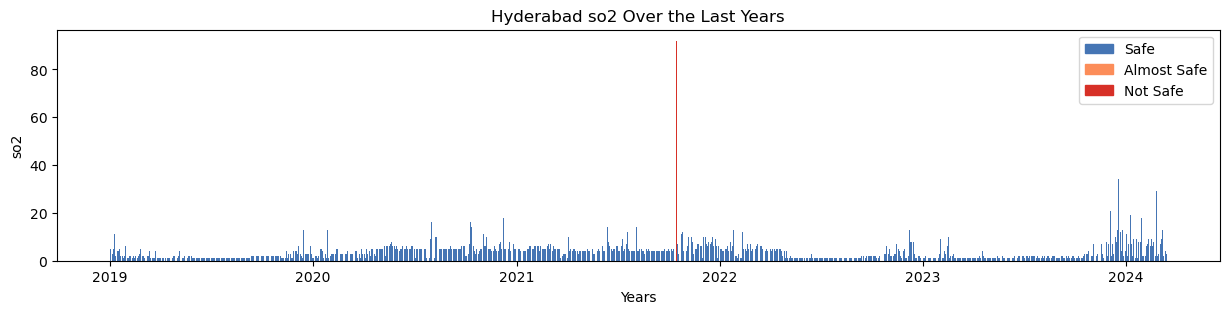

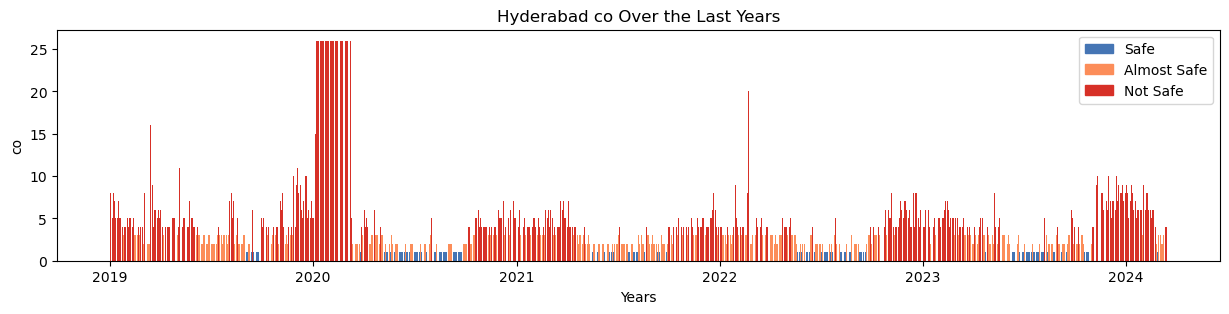


Processing file: aqi_Jaipur.csv


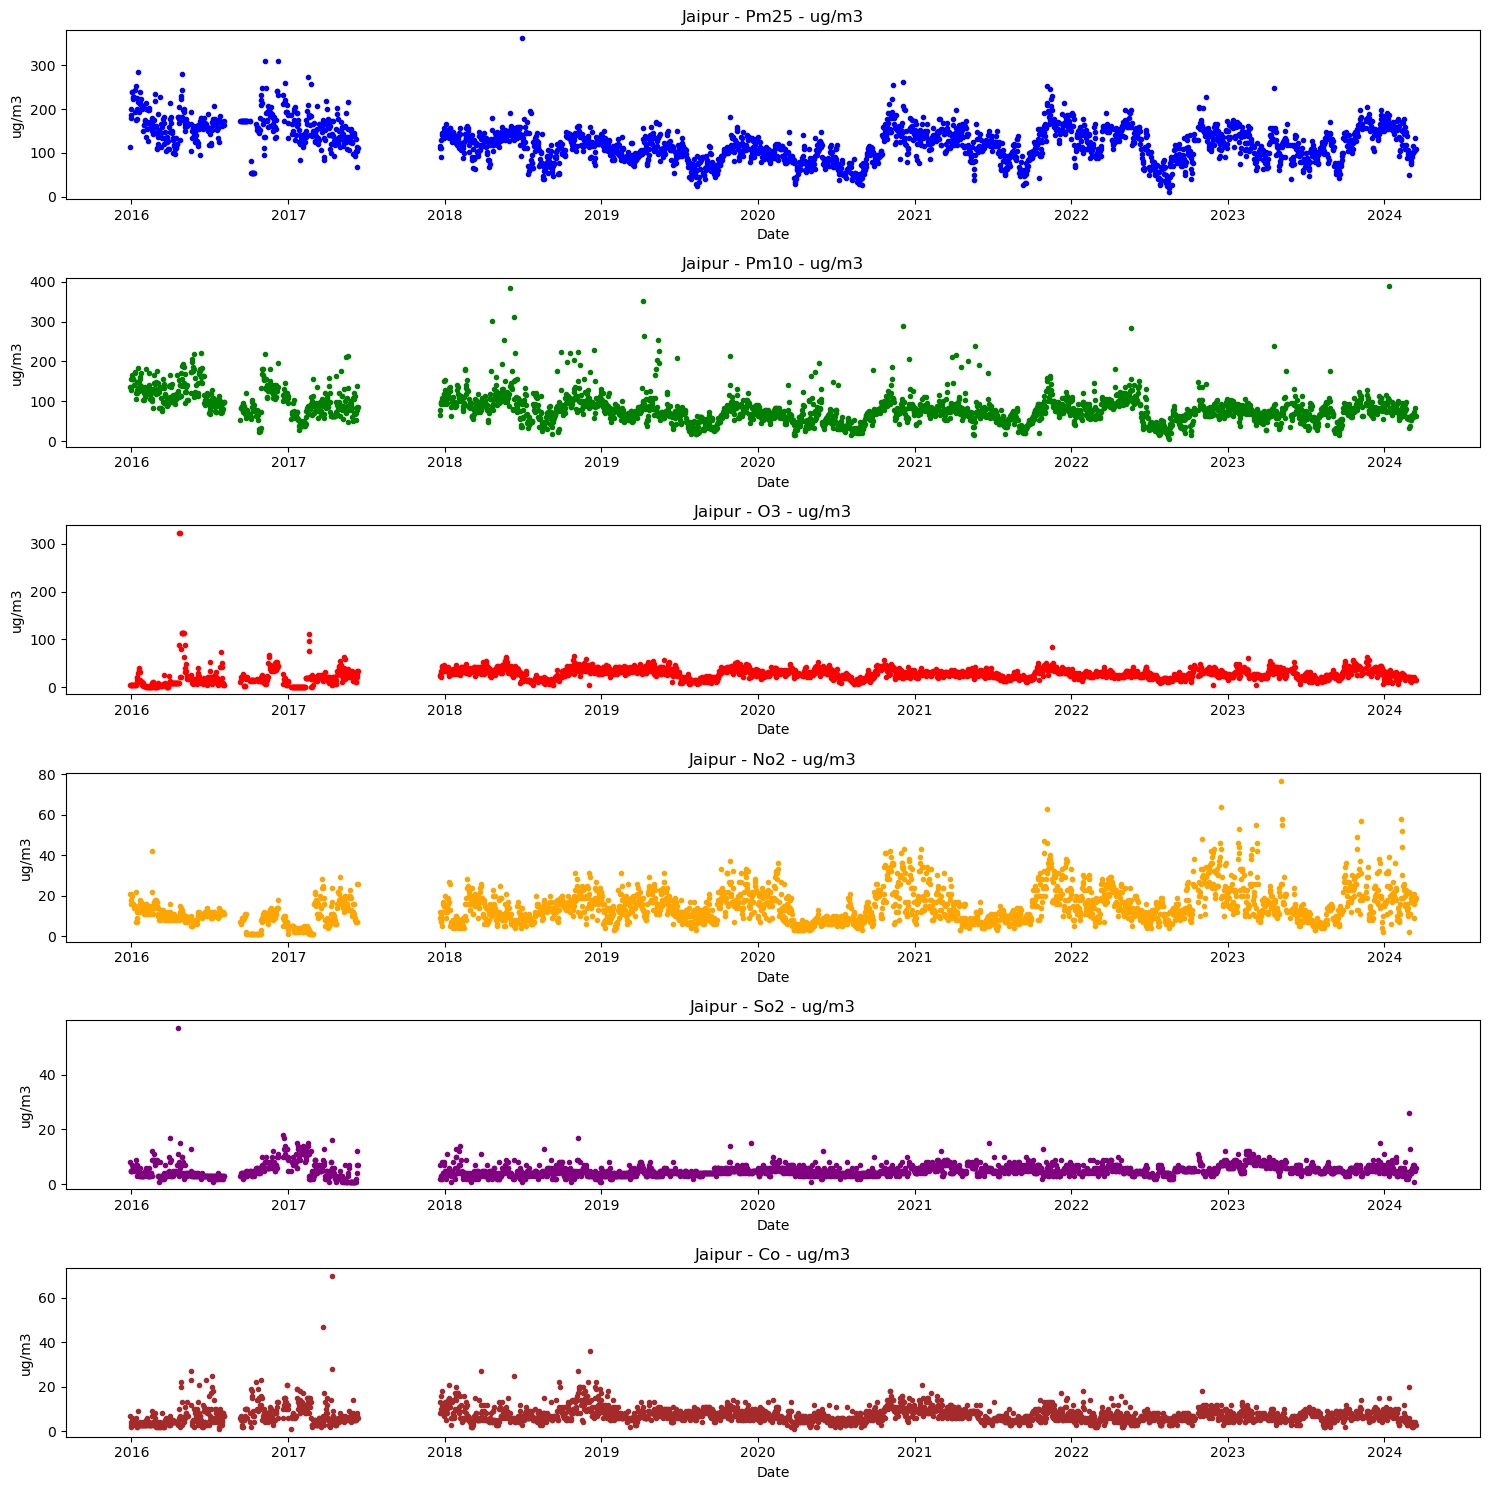

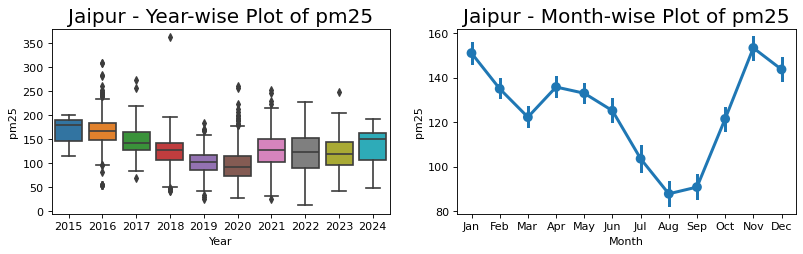

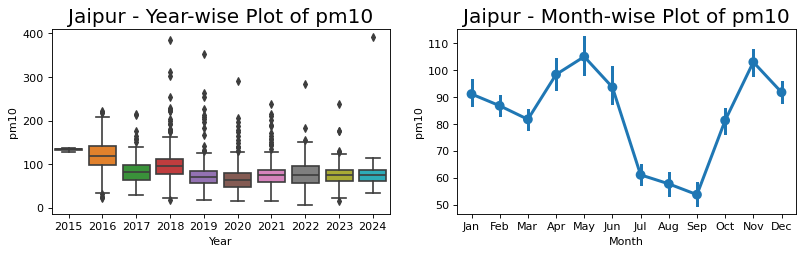

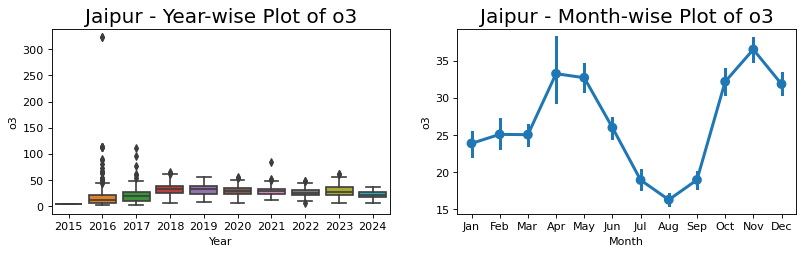

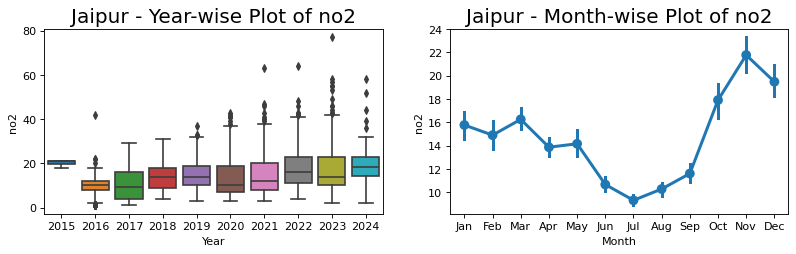

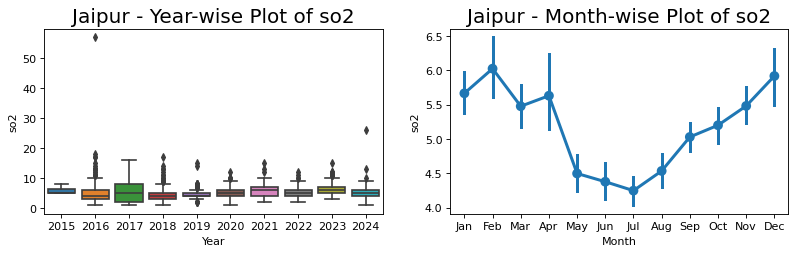

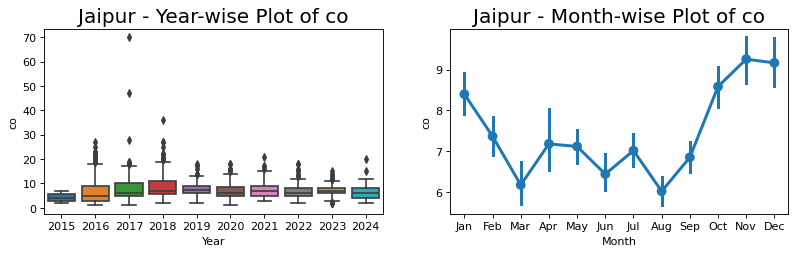

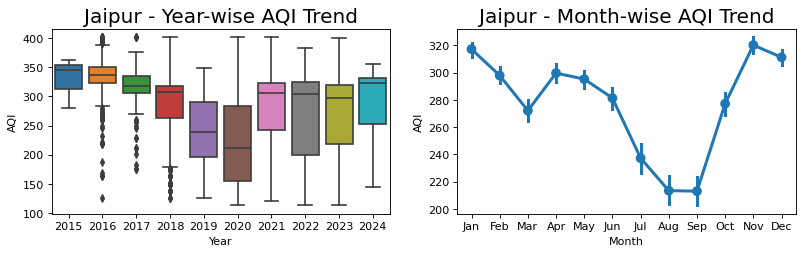

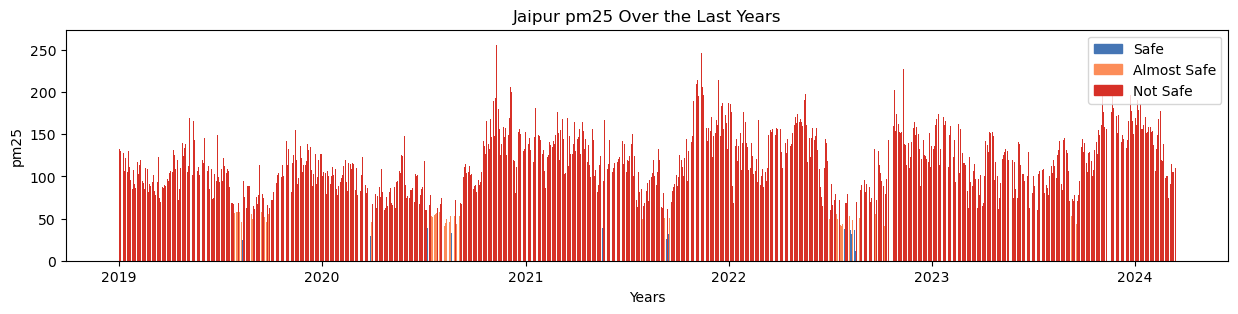

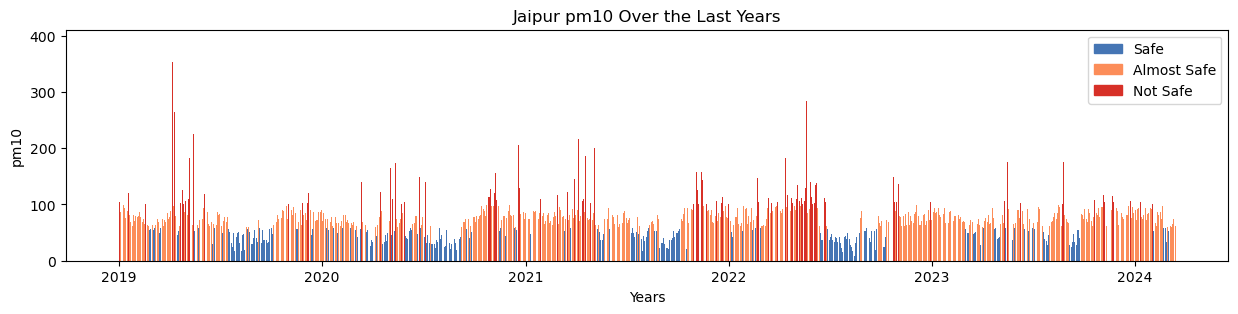

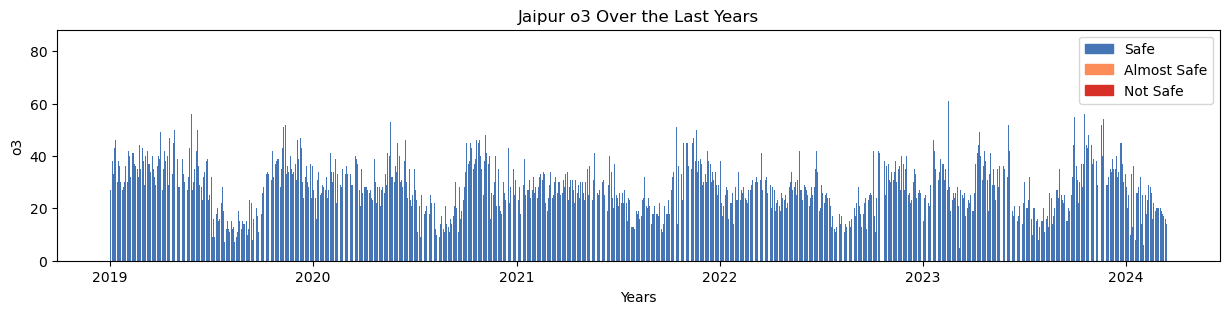

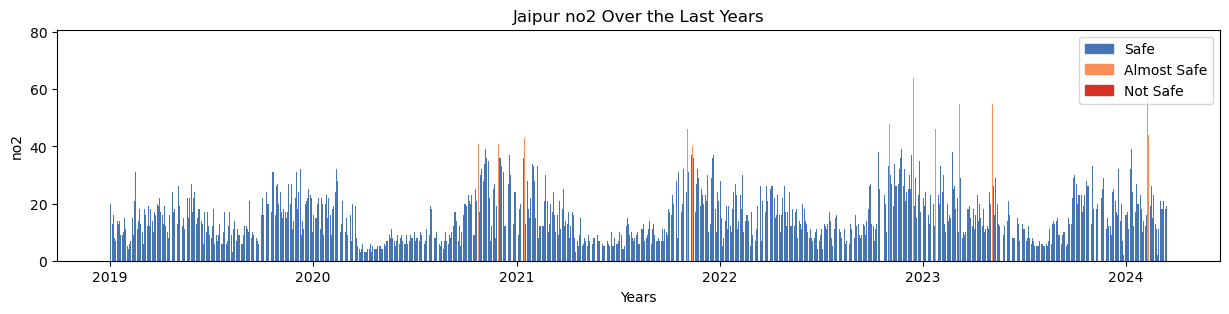

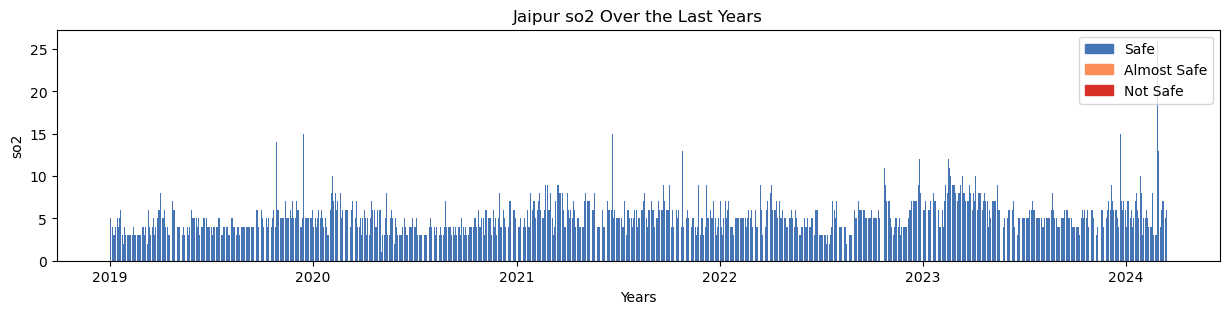

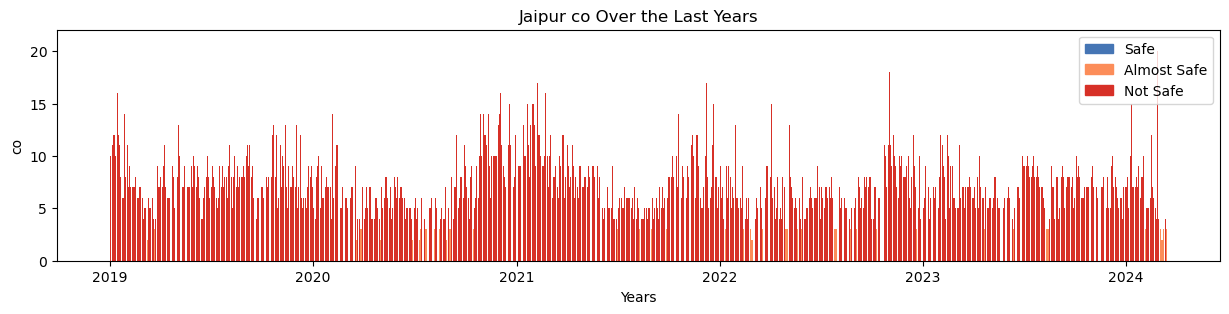


Processing file: aqi_Kanpur.csv


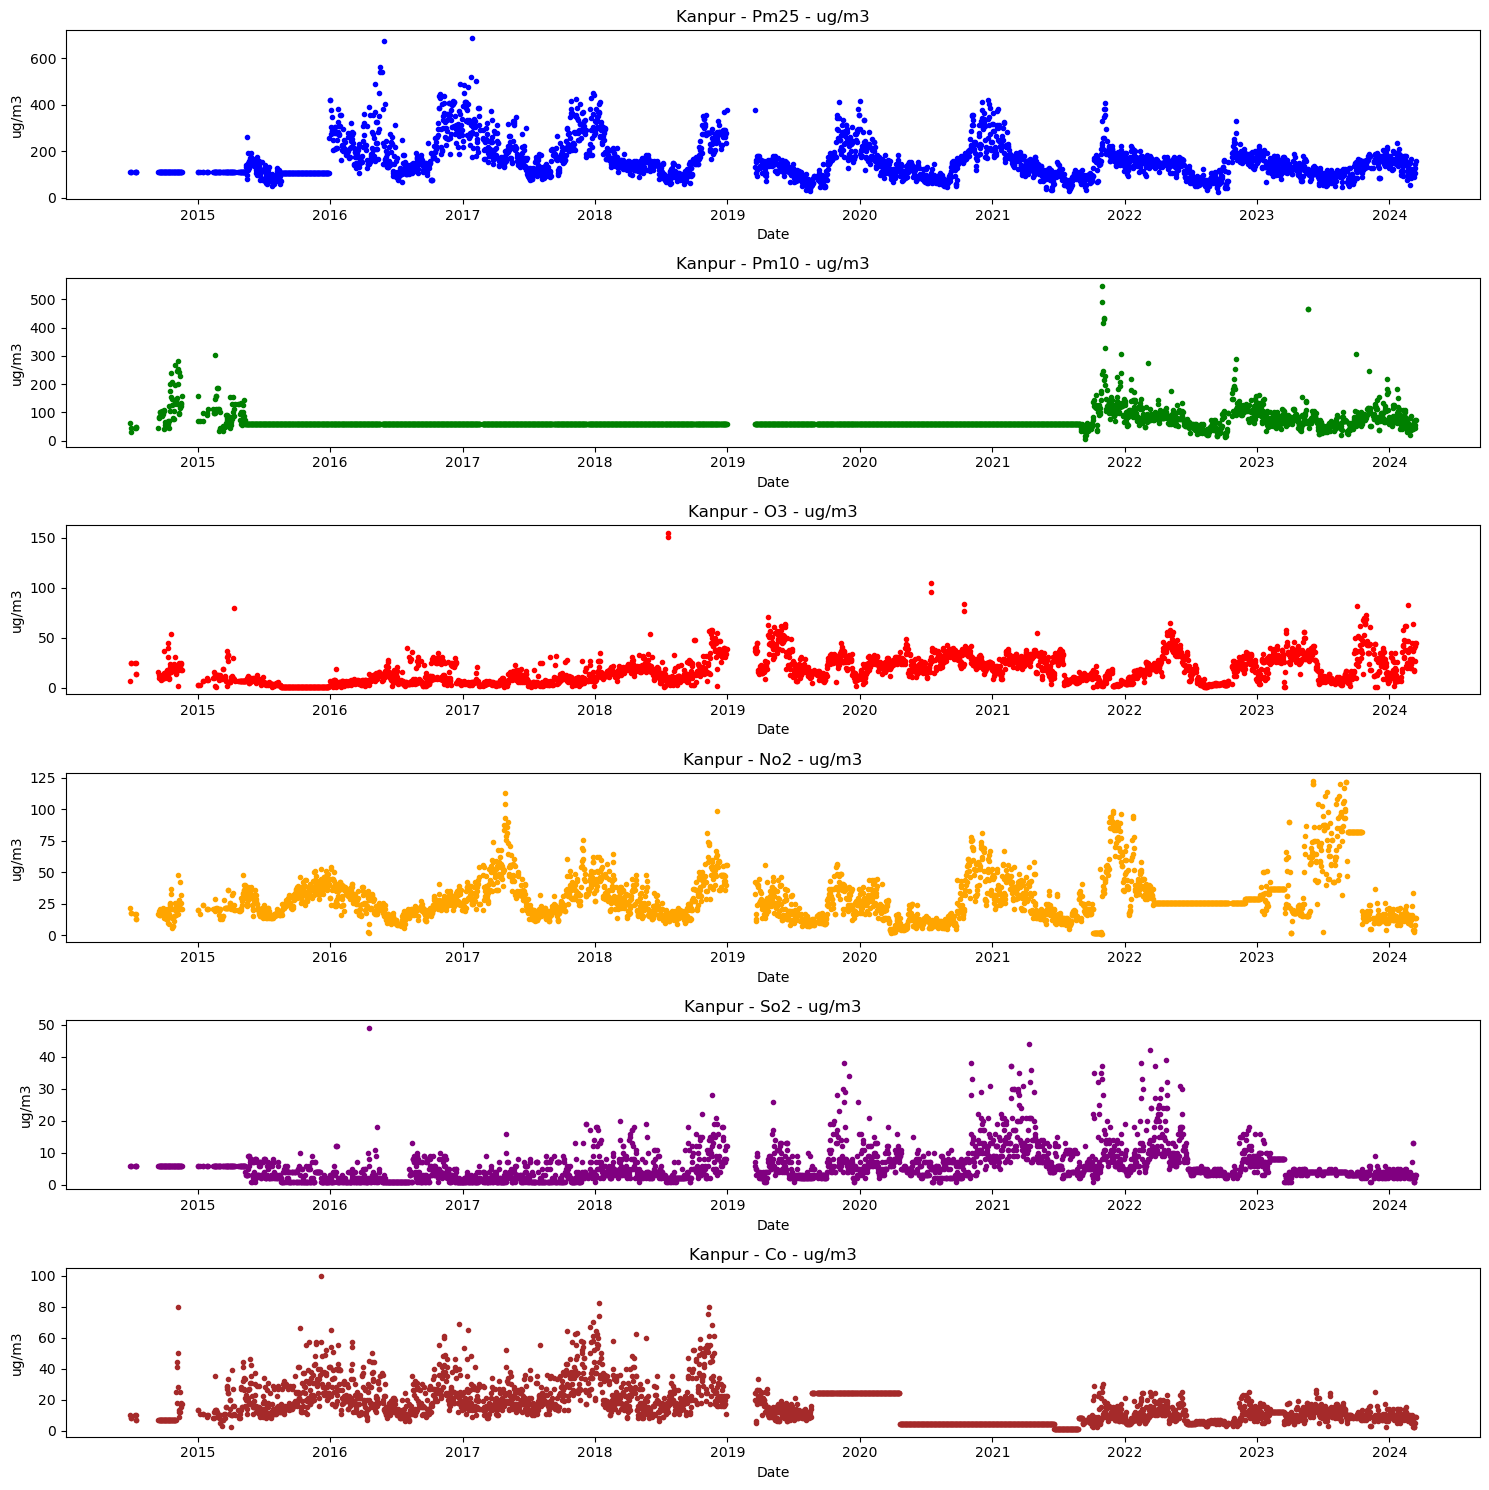

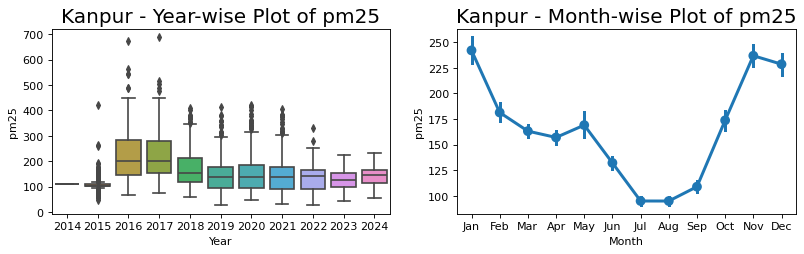

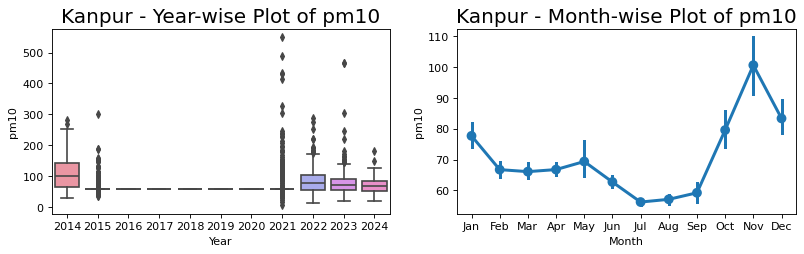

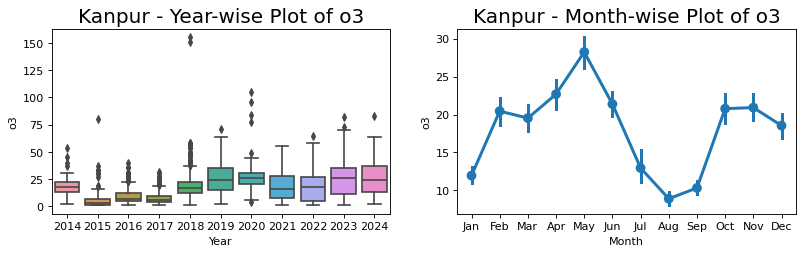

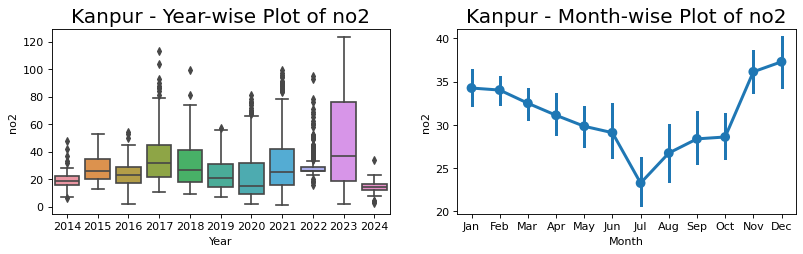

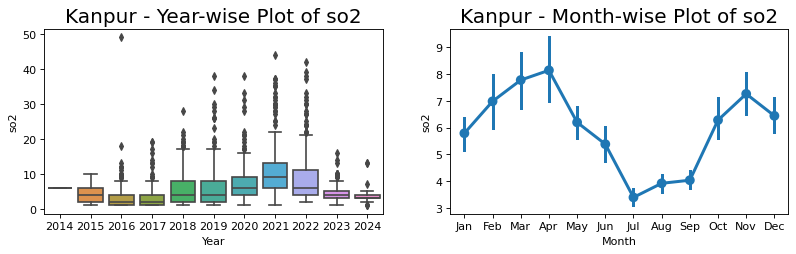

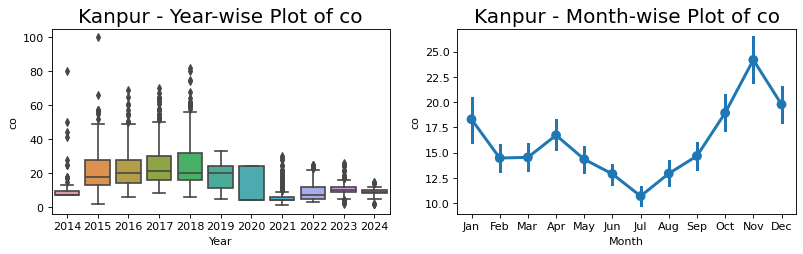

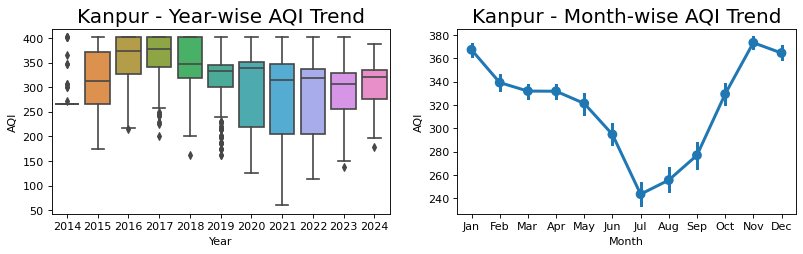

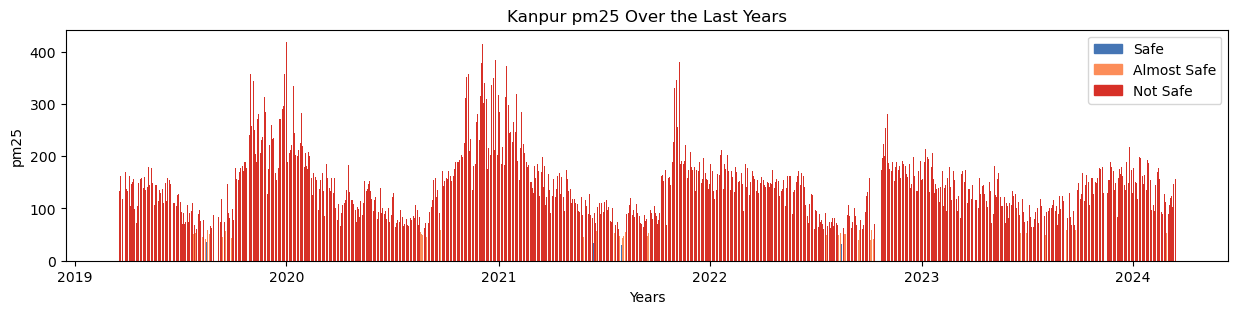

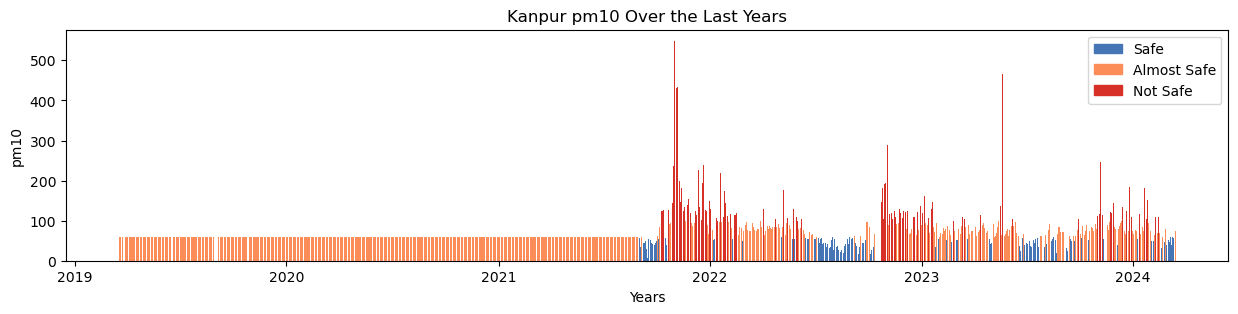

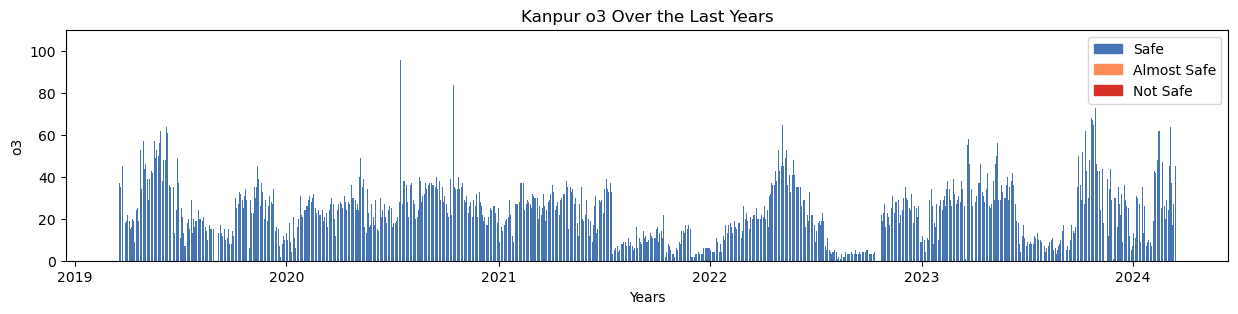

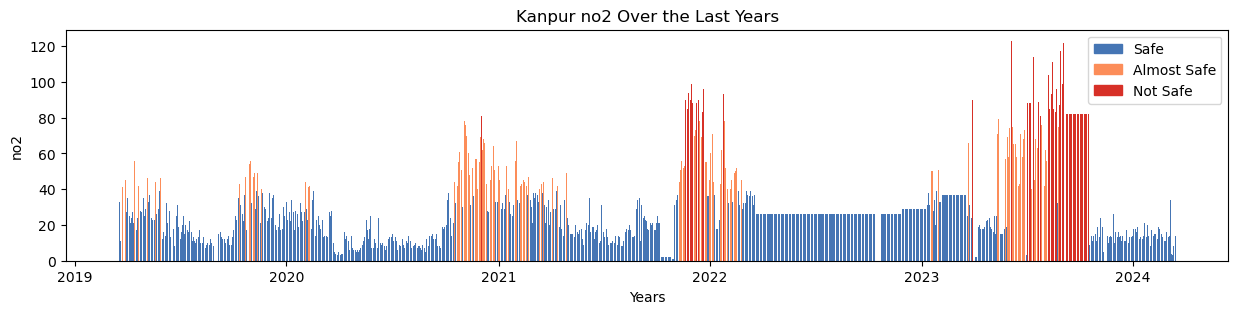

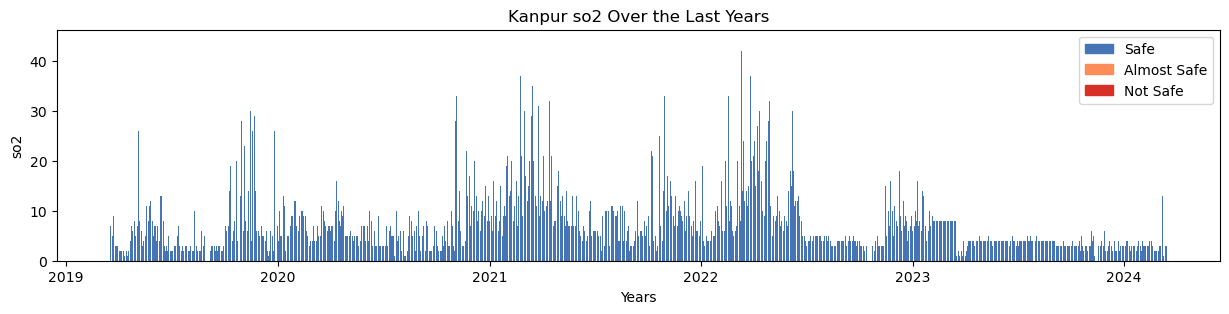

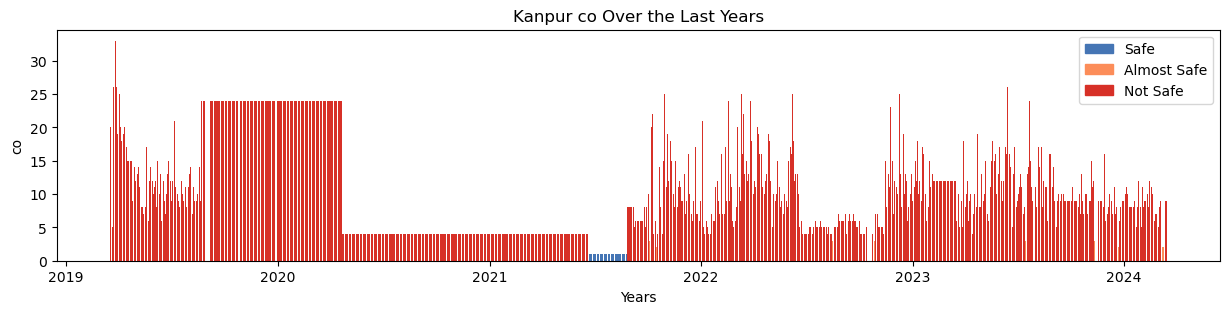


Processing file: aqi_Kolkata.csv


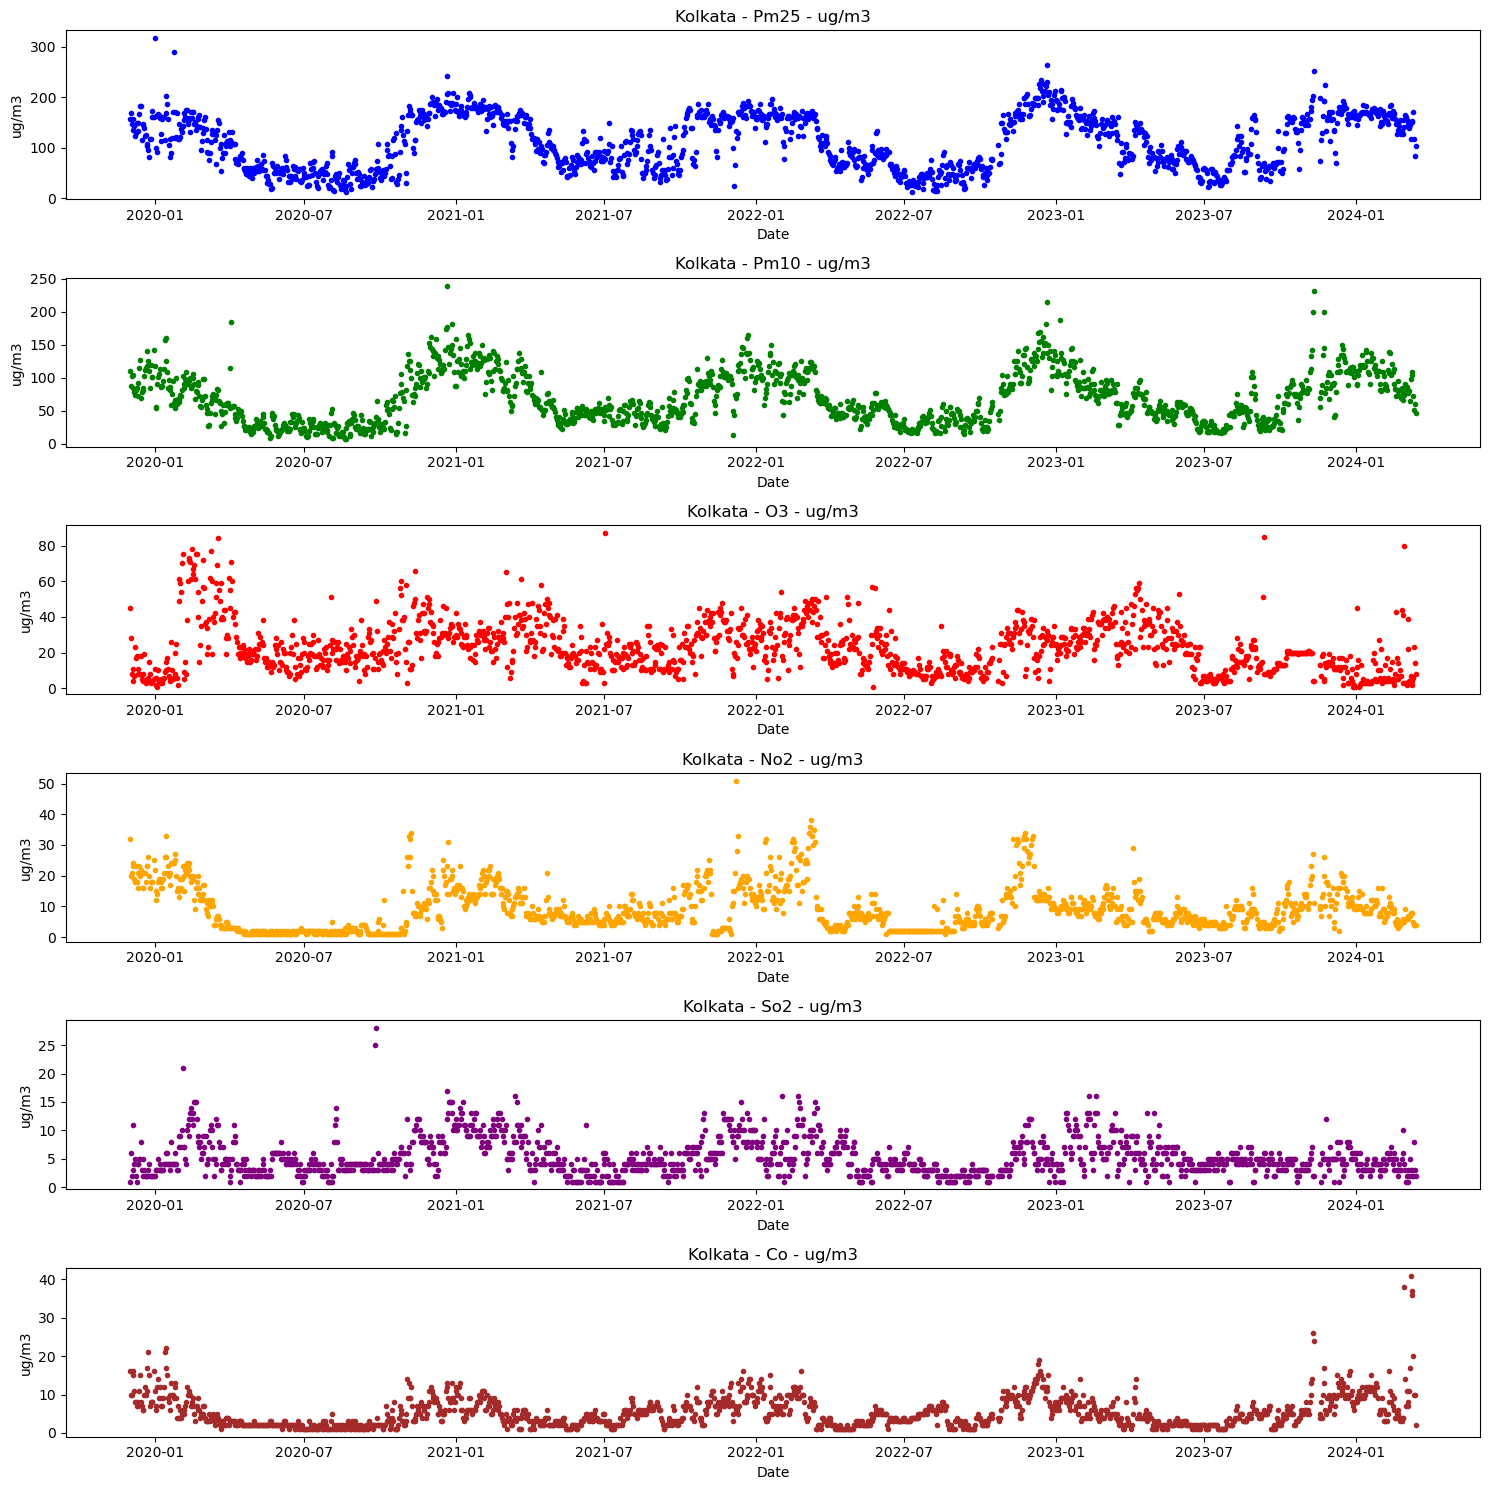

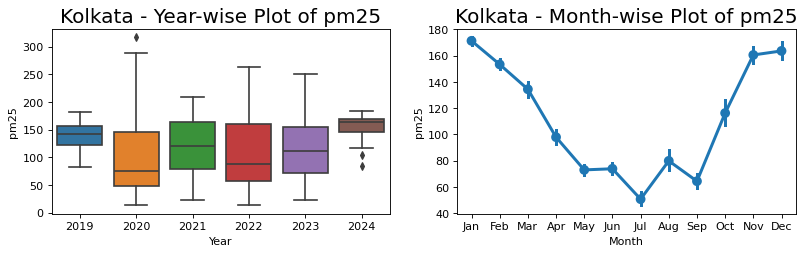

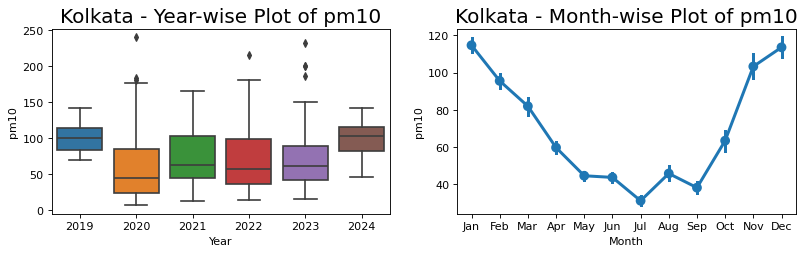

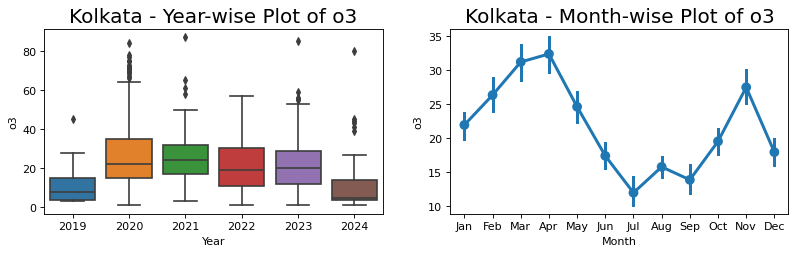

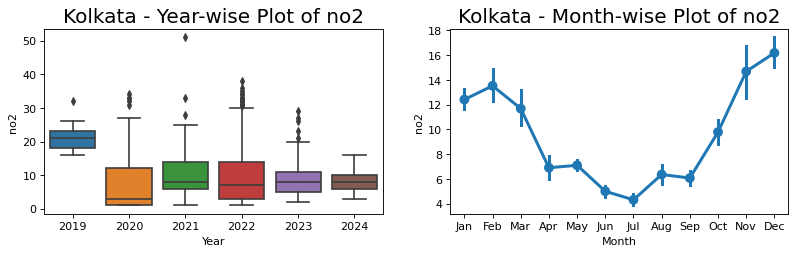

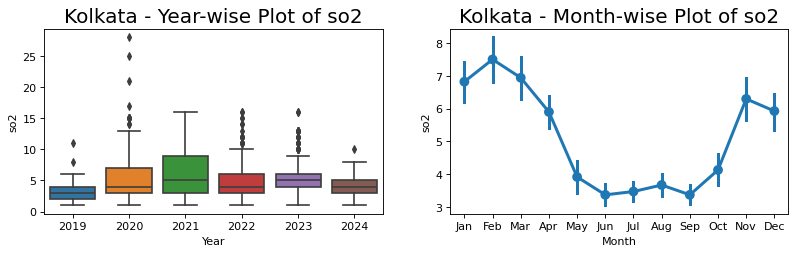

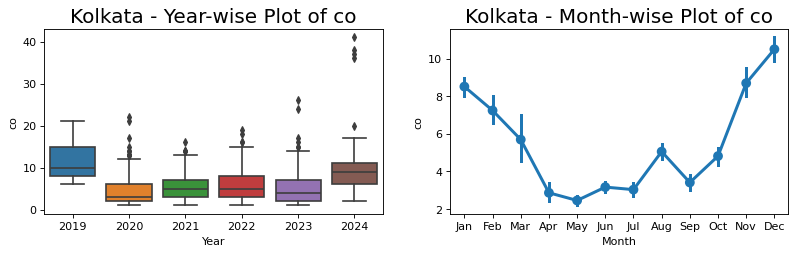

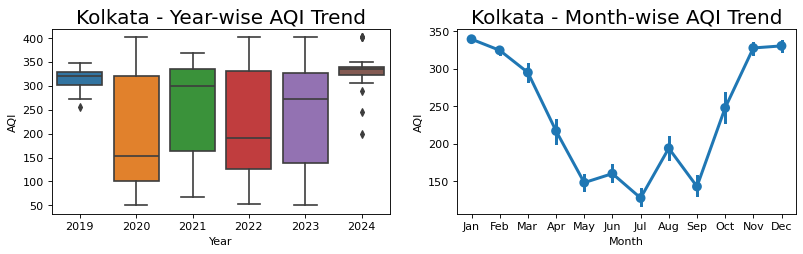

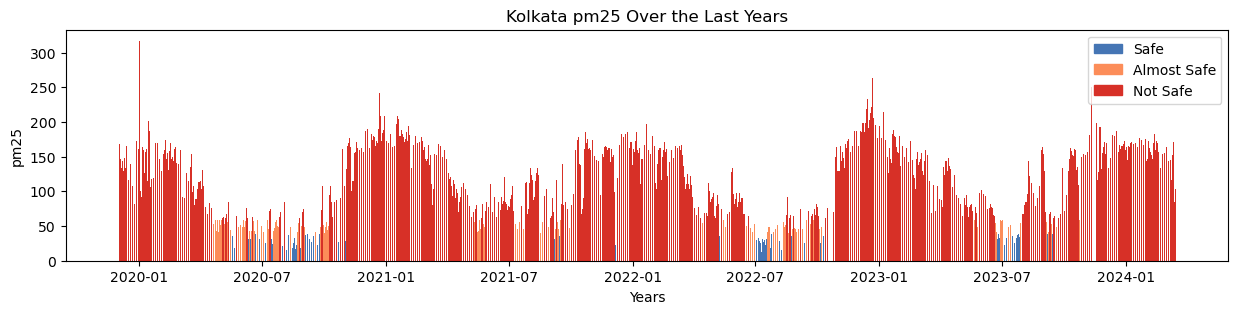

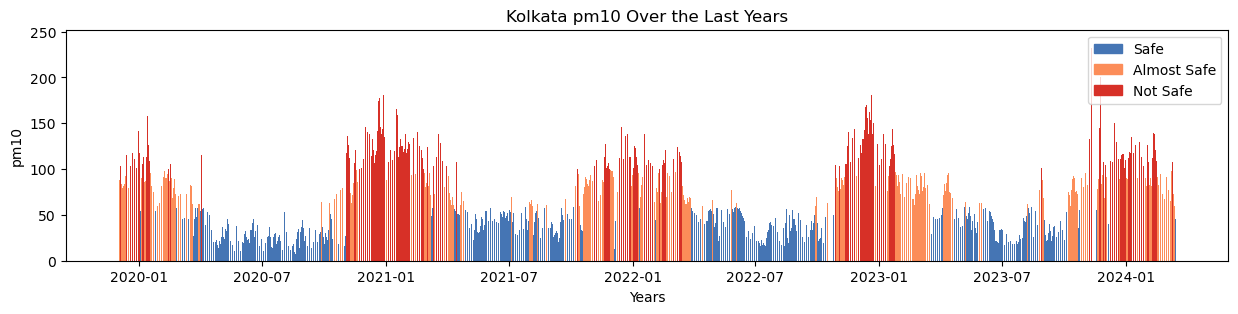

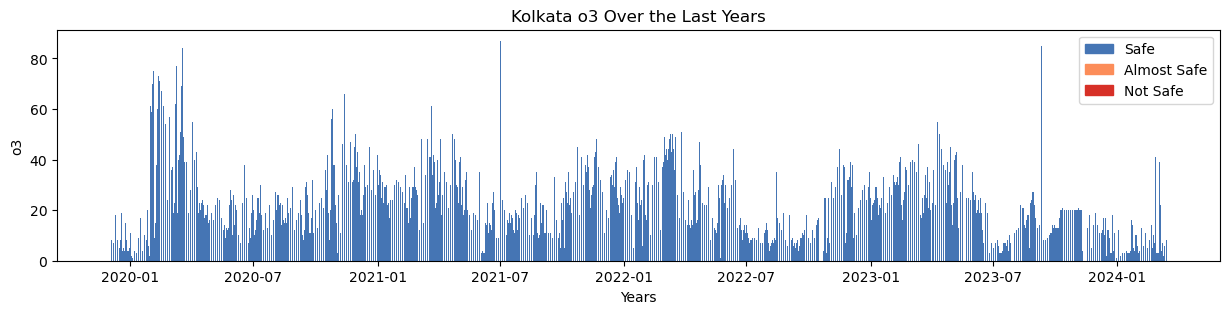

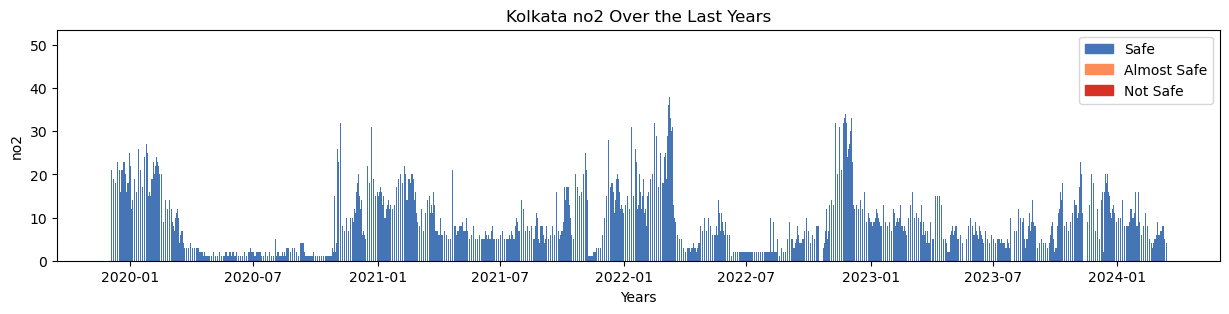

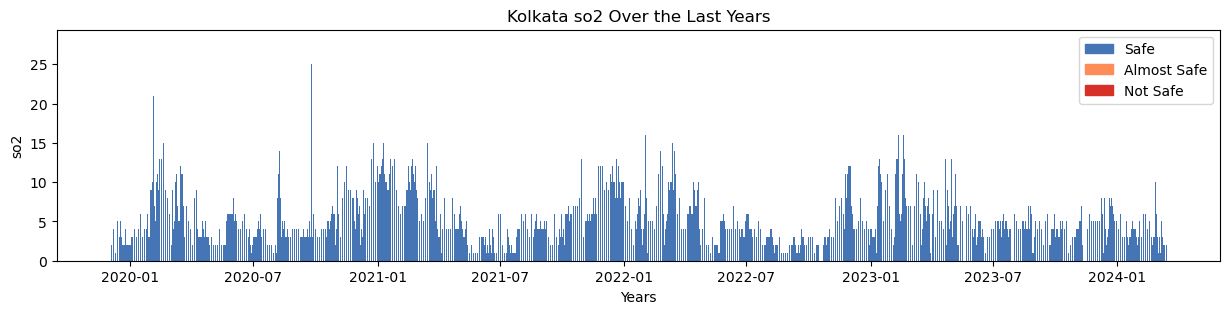

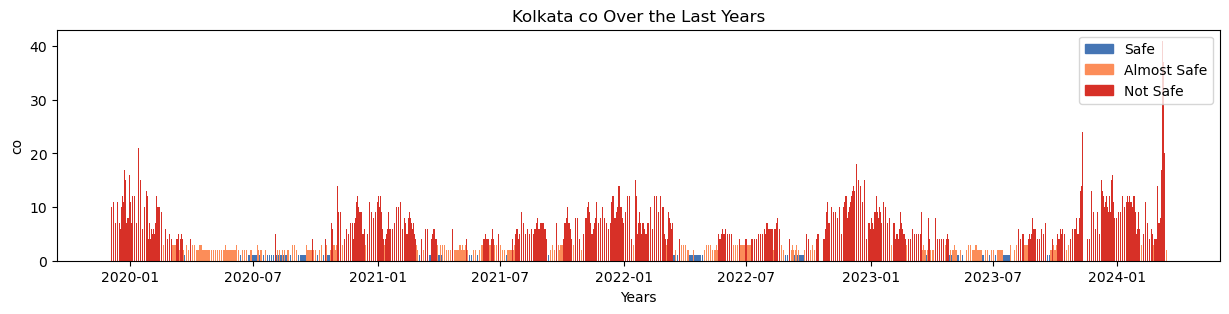


Processing file: aqi_Lucknow.csv


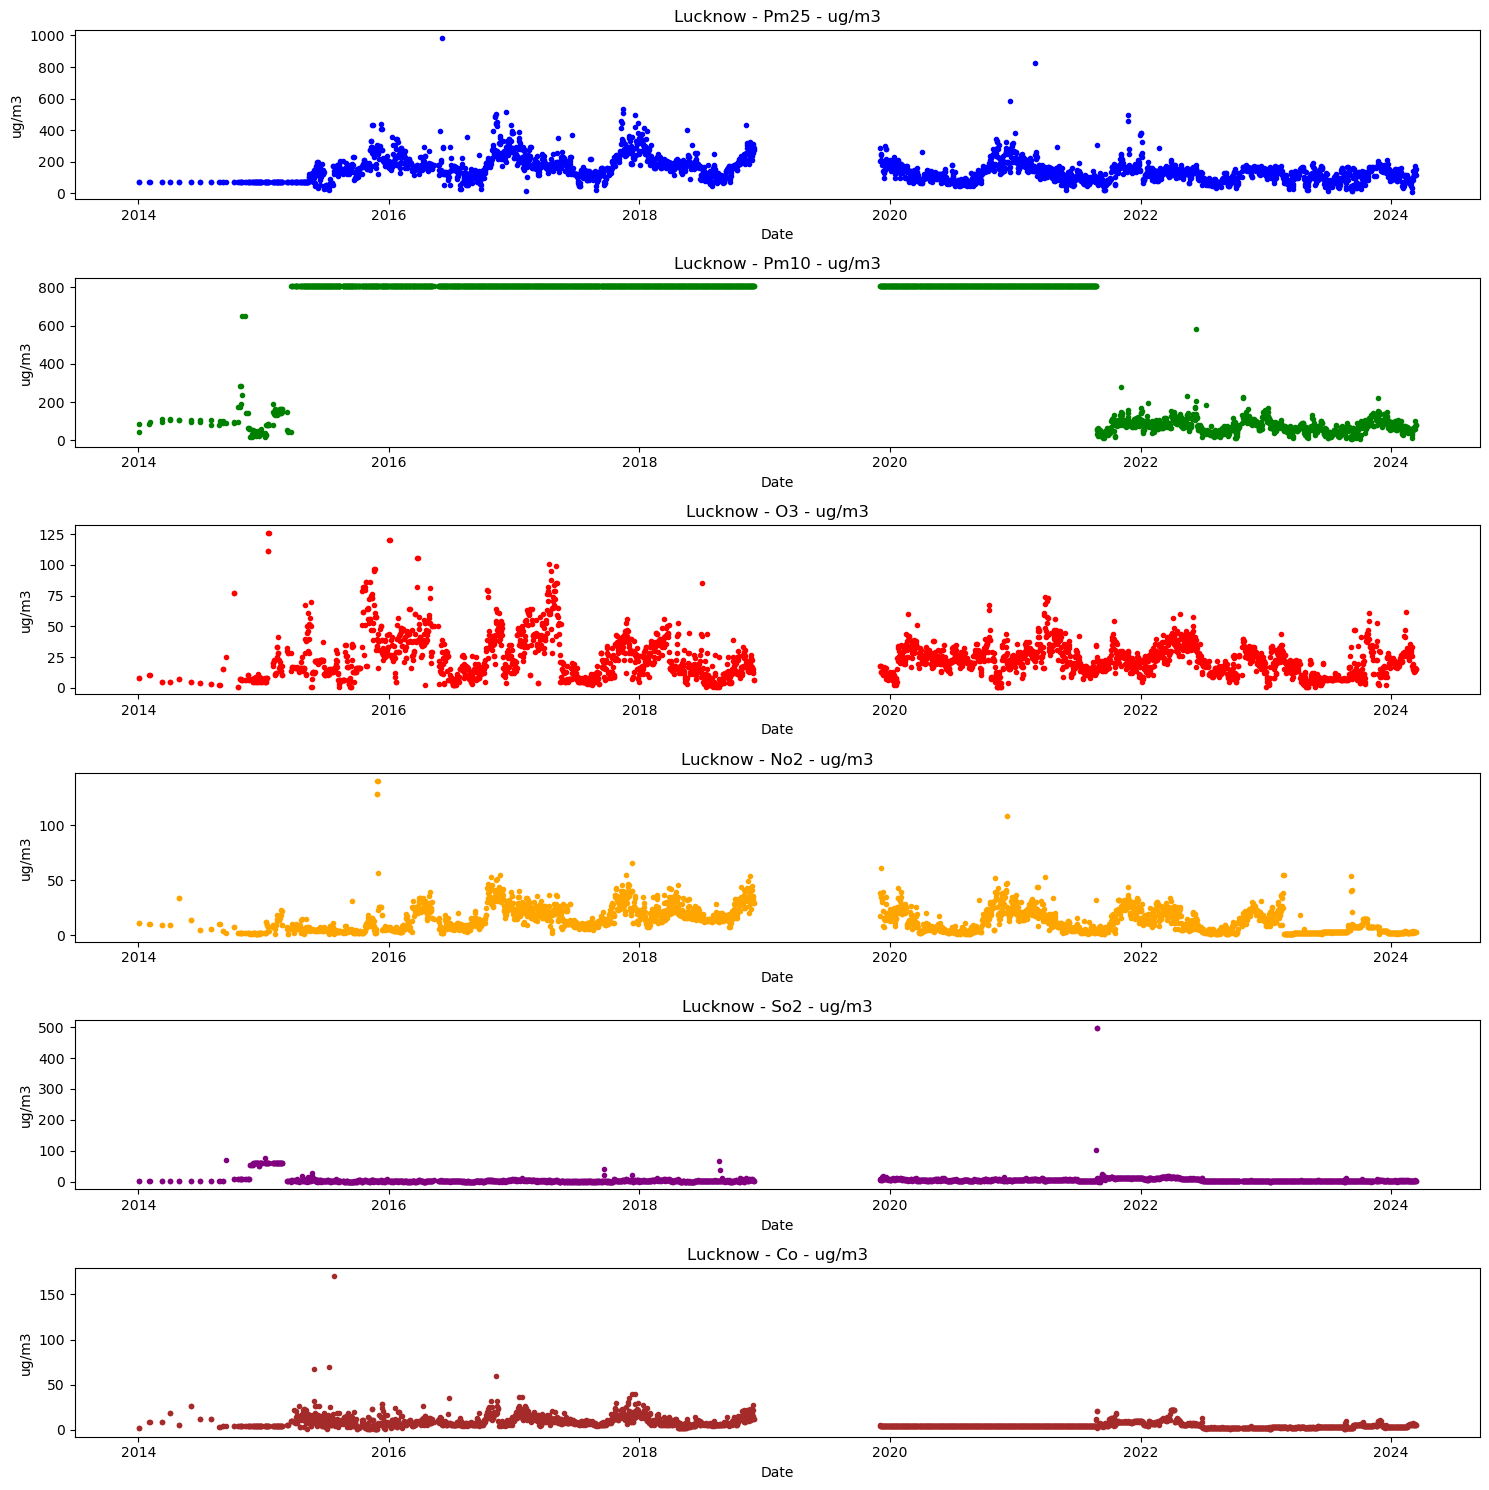

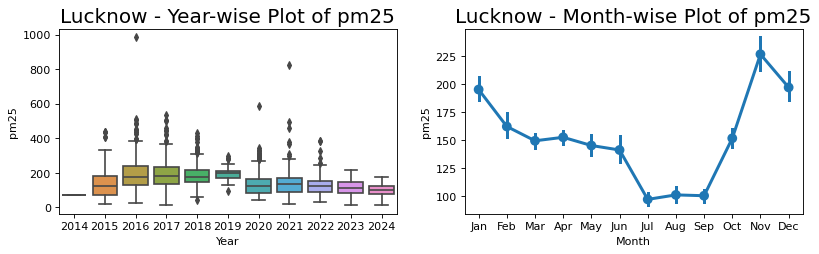

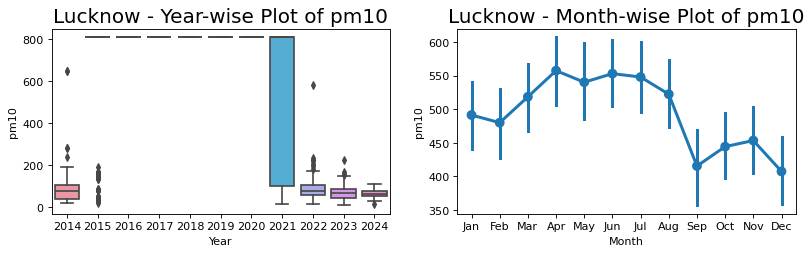

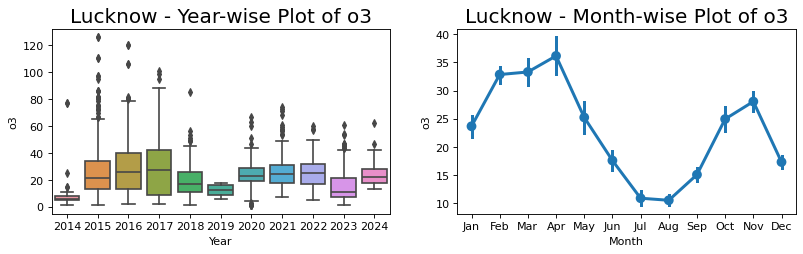

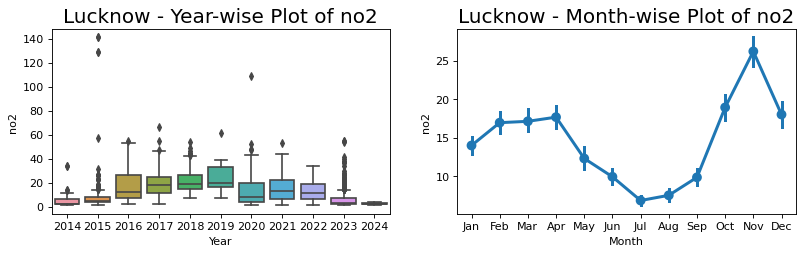

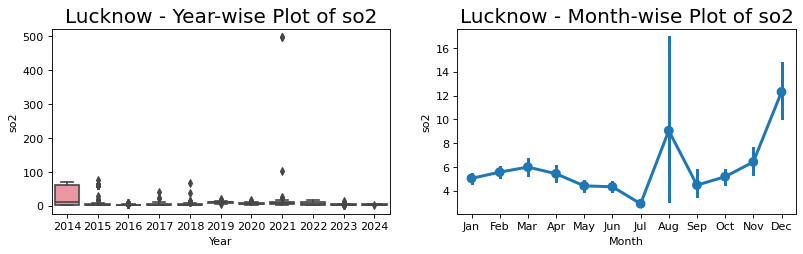

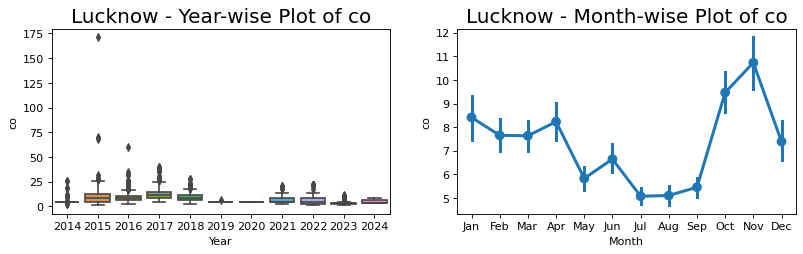

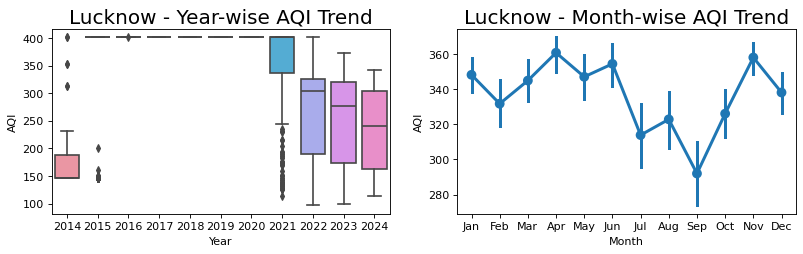

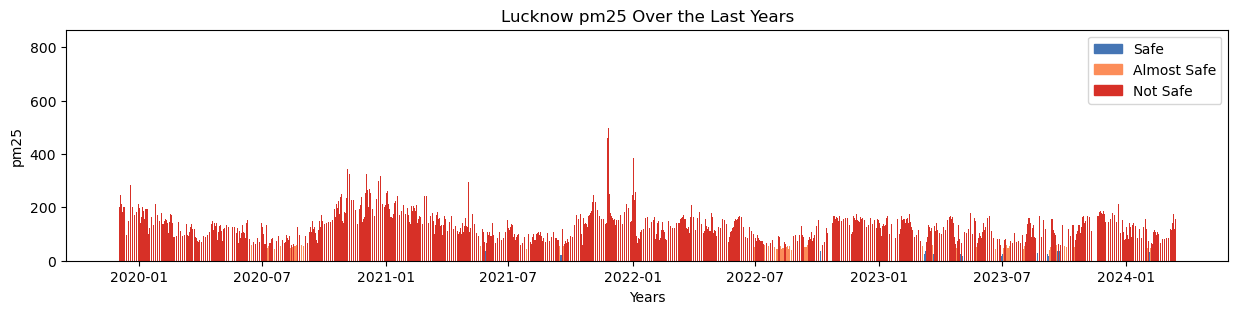

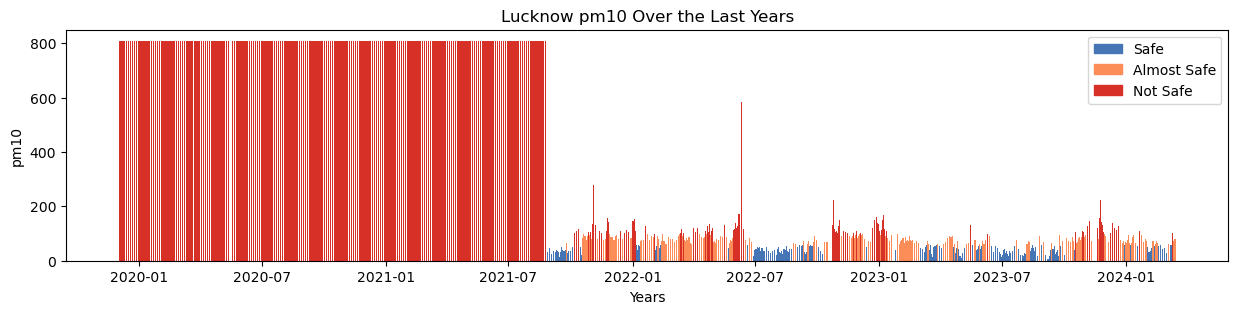

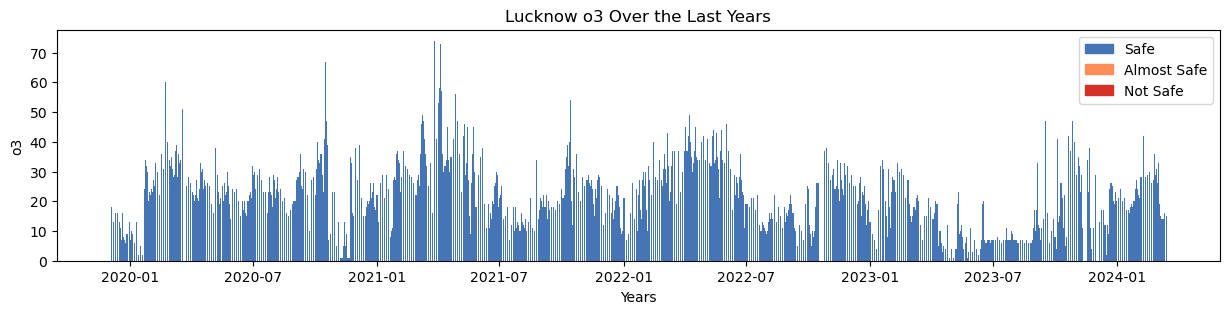

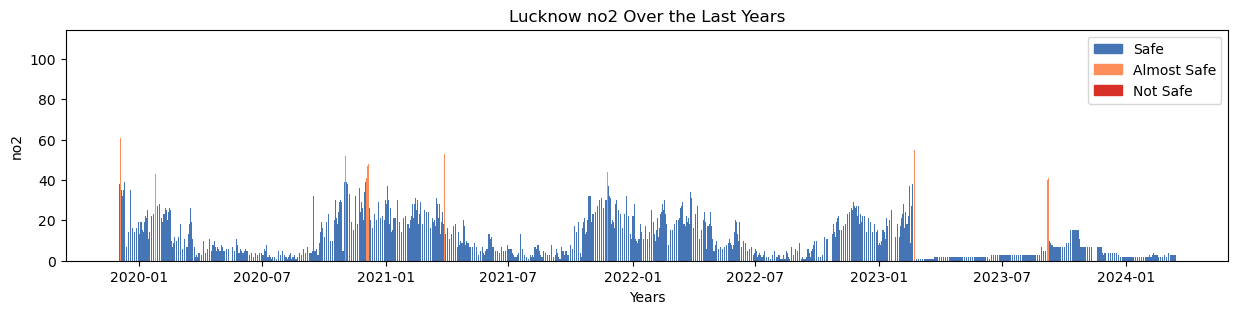

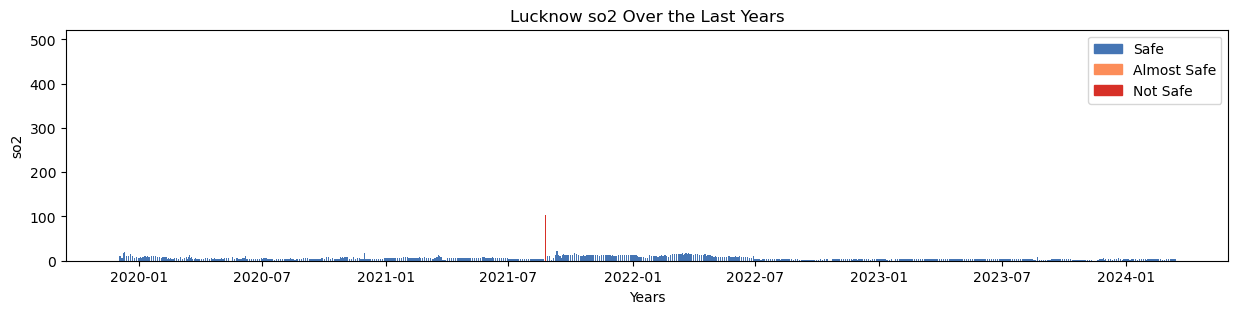

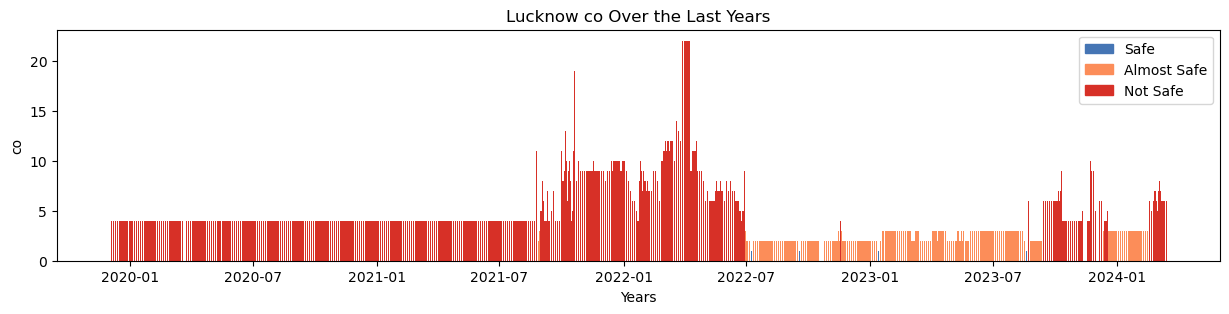


Processing file: aqi_Mumbai.csv


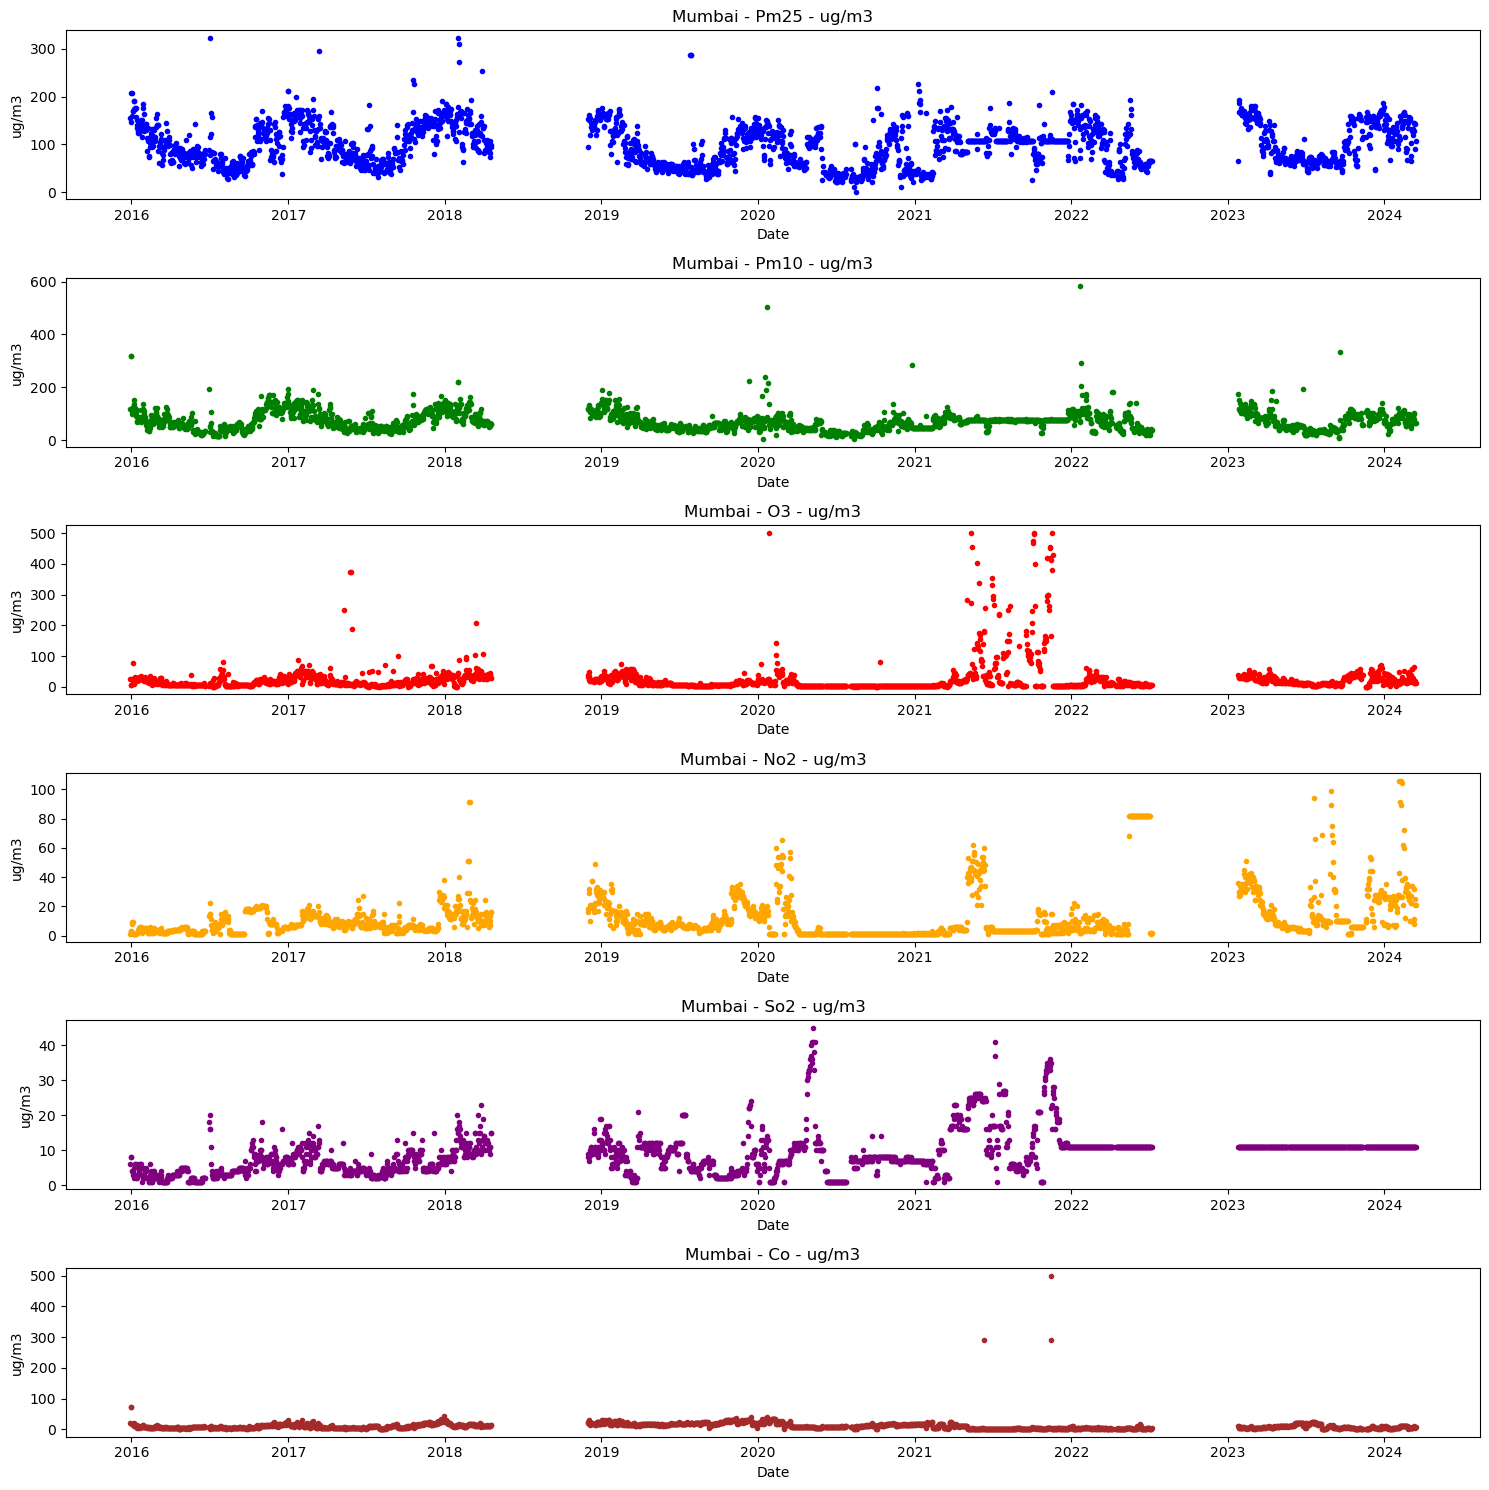

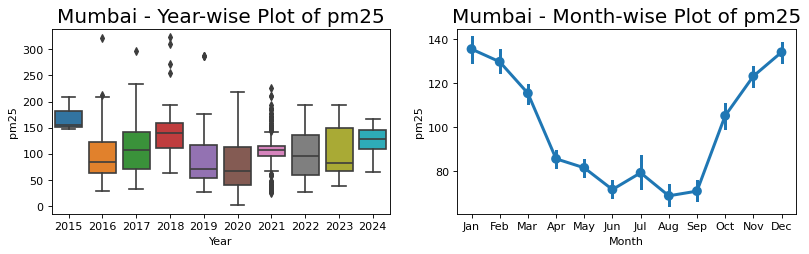

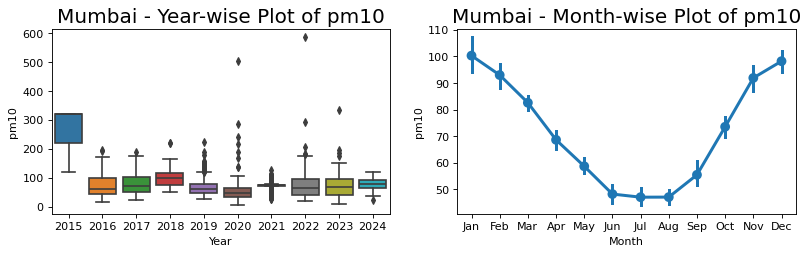

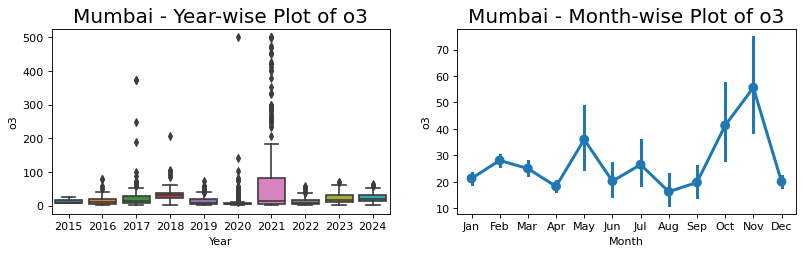

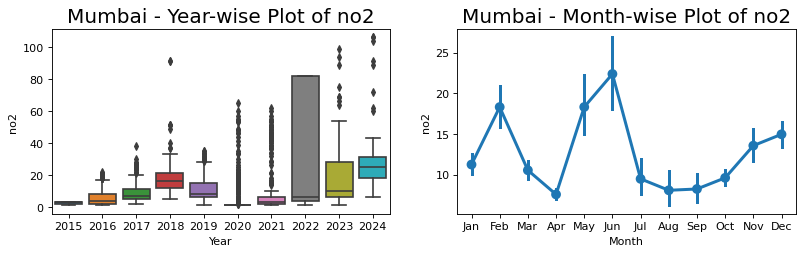

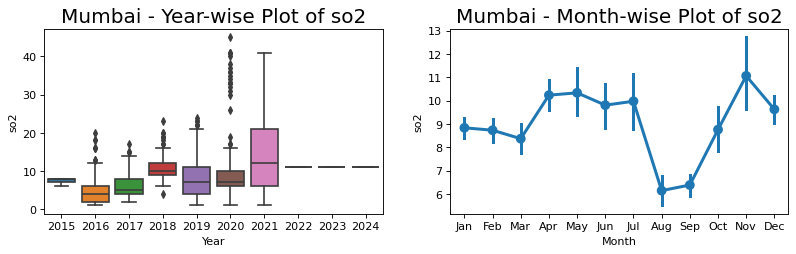

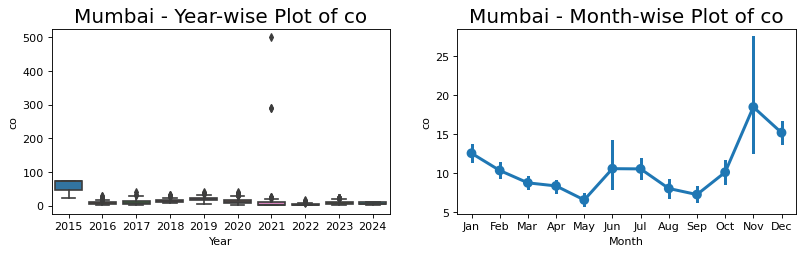

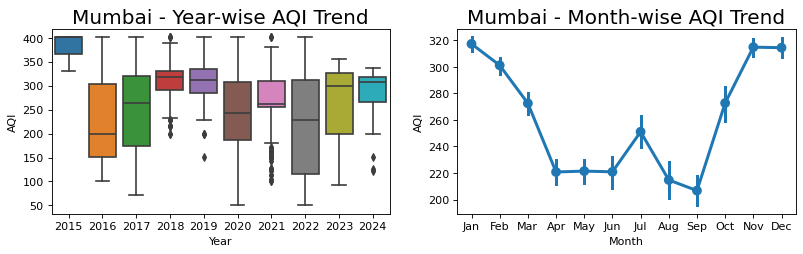

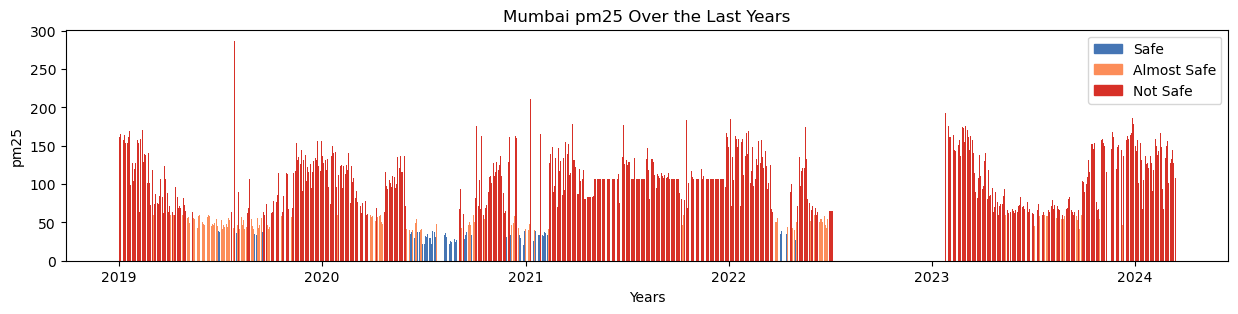

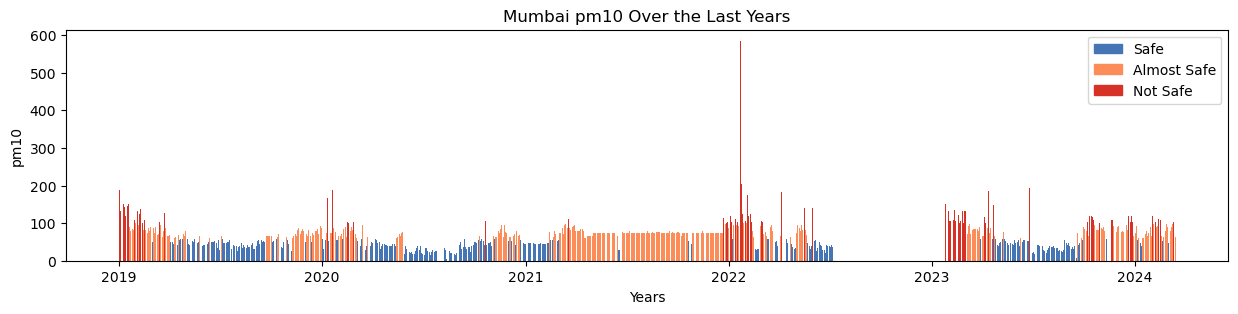

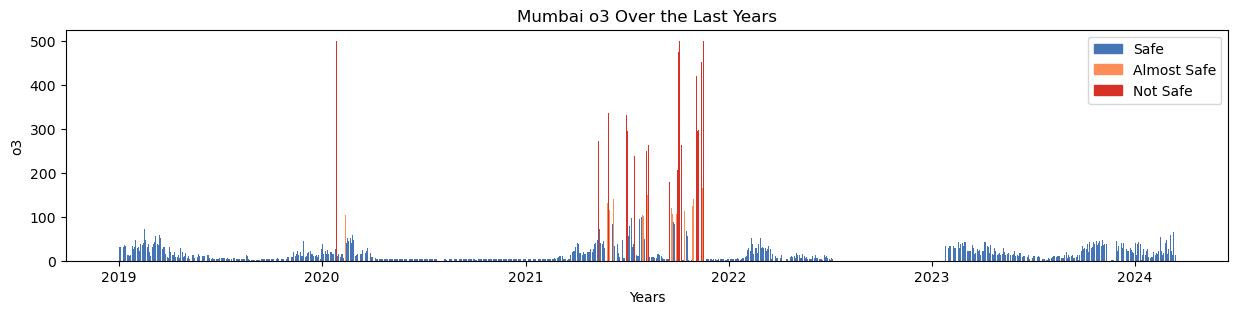

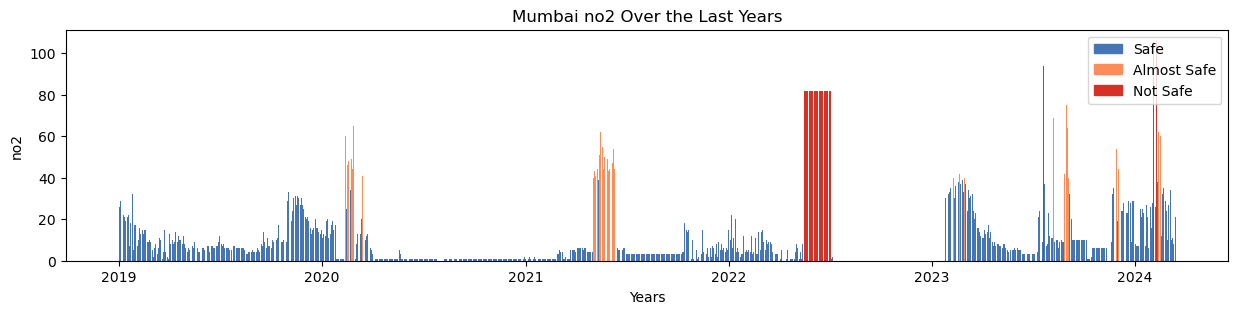

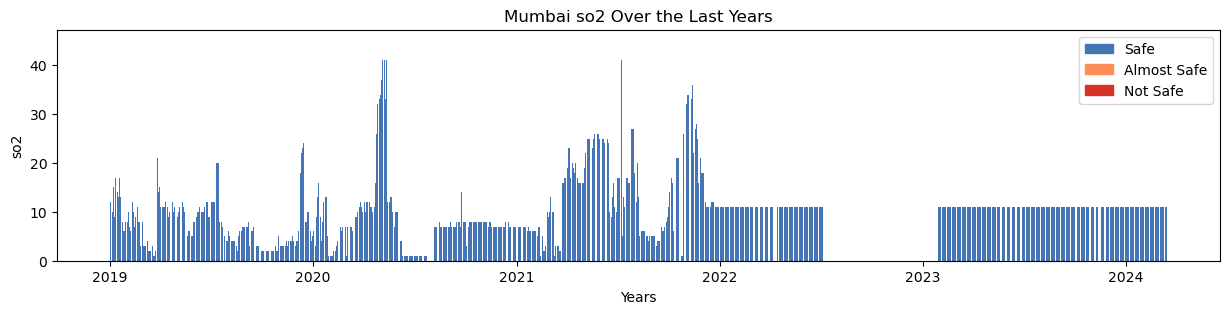

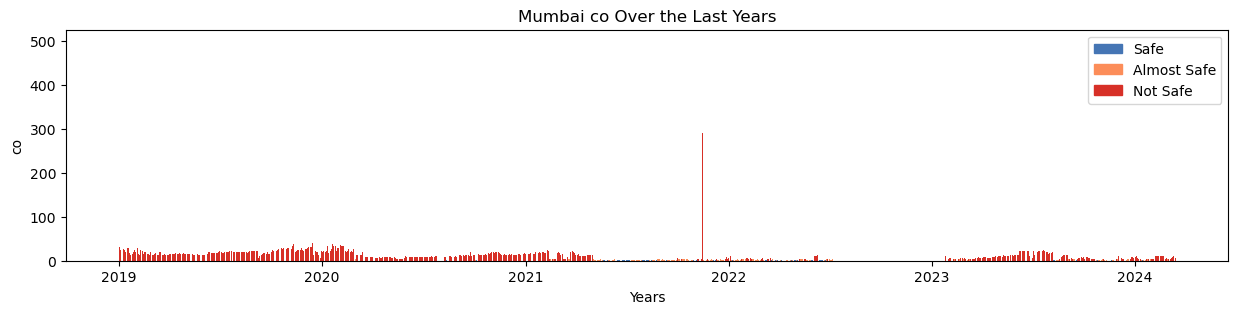

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Directory to start the search from
start_dir = '/Users/'

# Dictionary to store unique DataFrames with filenames as keys
dfs = {}

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if file.endswith('.csv') and 'aqi_' in file:
            file_path = os.path.join(root, file)
            if file not in dfs:  # Check if file name is not already in dictionary
                # Load CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Store DataFrame with filename as key
                dfs[file] = df
                print(f"Found file: {file}")

# Define the columns for pollutants (adjust this list based on your actual columns)
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
columns = pollutants + ['AQI']

# Define colors for each pollutant
pollutant_colors = {
    'pm25': 'blue',
    'pm10': 'green',
    'o3': 'red',
    'no2': 'orange',
    'so2': 'purple',
    'co': 'brown'
}

# Data Processing and Analysis Functions

# Function to plot entire data for a specific city with different colors for pollutants
def getEntireDataPlot(city_data, city_name):
    fig, axes = plt.subplots(len(pollutants), 1, figsize=(15, 15))
    for i, pollutant in enumerate(pollutants):
        axes[i].plot(city_data.index, city_data[pollutant], marker='.', linestyle='None', color=pollutant_colors[pollutant])
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('ug/m3')
        axes[i].set_title(f'{city_name} - {pollutant.capitalize()} - {axes[i].get_ylabel()}')
    plt.tight_layout()
    plt.show()

# Function to plot year-wise and month-wise trends for pollutants for a specific city
def trend_plot(city_data, city_name):
    city_data['Month'] = city_data['date'].dt.strftime('%b')
    city_data['Month'] = pd.Categorical(city_data['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
    
    for value in pollutants:
        fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=80)
        sns.boxplot(x='Year', y=value, data=city_data, ax=axes[0])
        sns.pointplot(x='Month', y=value, data=city_data.loc[~city_data.Year.isin([2015, 2020]), :], ax=axes[1])
        axes[0].set_title(f'{city_name} - Year-wise Plot of {value}', fontsize=18)
        axes[1].set_title(f'{city_name} - Month-wise Plot of {value}', fontsize=18)
        plt.show()

# Function to plot AQI trends for a specific city
def getAQITrend(city_data, city_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=80)
    sns.boxplot(x='Year', y='AQI', data=city_data, ax=axes[0])
    sns.pointplot(x='Month', y='AQI', data=city_data.loc[~city_data.Year.isin([2015, 2020]), :], ax=axes[1])
    axes[0].set_title(f'{city_name} - Year-wise AQI Trend', fontsize=18)
    axes[1].set_title(f'{city_name} - Month-wise AQI Trend', fontsize=18)
    plt.show()

# Function to get color based on AQI value
def getColorBar(AQI_pivot):
    col = []
    for val in AQI_pivot:
        if val < 50:
            col.append('#4575b4')
        elif val < 101:
            col.append('#91bfdb')
        elif val < 201:
            col.append('#e0f3f8')
        elif val < 301:
            col.append('#fee090')
        elif val < 401:
            col.append('#fc8d59')
        else:
            col.append('#d73027')
    return col

# Function to plot AQI for the last two years for a specific city
def getAQILastYears(city_data, city_name):
    filtered_city_day = city_data[city_data['date'] >= '2019-01-01']
    AQI = filtered_city_day['AQI']
    AQI.fillna(method='bfill', inplace=True)
    colors = getColorBar(AQI)
    
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(AQI.index, AQI, color=colors, width=0.75)
    
    color_legend = {
        'Good': '#4575b4', 'Satisfactory': '#91bfdb', 'Moderate': '#e0f3f8',
        'Poor': '#fee090', 'Very Poor': '#fc8d59', 'Severe': '#d73027'
    }
    labels = list(color_legend.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_legend[label]) for label in labels]
    ax.legend(handles, labels, loc='upper right')
    ax.set_title(f'{city_name} AQI Over the Last Years')
    ax.set_ylabel('AQI')
    ax.set_xlabel('Years')
    plt.show()
# Function to plot pollutants for the last years for a specific city
def getPollutantsLastYears(city_data, cols, pollutant, safevalue, almostsafe, city_name):
    filtered_city_day = city_data[city_data['date'] >= '2019-01-01']
    data_pollutants = filtered_city_day[cols]
    data_pollutants.fillna(method='bfill', inplace=True)
    
    col = []
    for val in data_pollutants[pollutant]:
        if val < safevalue:
            col.append('#4575b4')
        elif val < almostsafe:
            col.append('#fc8d59')
        else:
            col.append('#d73027')
    
    colors = {'Safe': '#4575b4', 'Almost Safe': '#fc8d59', 'Not Safe': '#d73027'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
    
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(data_pollutants.index, data_pollutants[pollutant], color=col, width=0.75)
    ax.legend(handles, labels, loc='upper right')
    ax.set_title(f'{city_name} {pollutant} Over the Last Years')
    ax.set_ylabel(pollutant)
    ax.set_xlabel('Years')
    plt.show()

# Loop through each DataFrame and perform analysis
for filename, df in dfs.items():
    print(f"\nProcessing file: {filename}")
    
    # Drop 'Location' column and convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract year, month, and day from the 'date' column
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month
    df['Day'] = df['date'].dt.day
    
    # Get unique city names
    cities = df['Location'].unique()
    
    # Loop through each city and generate plots
    for city_name in cities:
        city_data = df[df['Location'] == city_name].copy()
        city_data.set_index('date', inplace=True, drop=False)
        
        getEntireDataPlot(city_data, city_name)
        trend_plot(city_data, city_name)
        getAQITrend(city_data, city_name)
        
        for pollutant, safevalue, almostsafe in [
            ('pm25', 40, 60),
            ('pm10', 60, 100),
            ('o3', 100, 180),
            ('no2', 40, 80),
            ('so2', 50, 80),
            ('co', 2, 4)
        ]:
            getPollutantsLastYears(city_data, pollutants, pollutant, safevalue, almostsafe, city_name)